## CartPole Q-Learning
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

ENV = 'CartPole-v0'
NUM_DIGITIZED = 6
GAMMA = 0.99
ETA = 0.5
MAX_STEPS = 200
NUM_EPISODES = 1000

def display_frames_as_gif(frames):
    print('output movie...')
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=20)
    anim.save('movie_cartpole.mp4')
    display(display_animation(anim, default_mode='loop'))

In [2]:
class Agent:
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)
        
    def update_Q_function(self, observation, action, reward, observation_next):
        self.brain.update_Q_table(
            observation, action, reward, observation_next)
        
    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action
    
class Brain:
    def __init__(self, num_states, num_actions):
        self.num_actions = num_actions
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIGITIZED**num_states, num_actions))
        
    def bins(self, clip_min, clip_max, num):
        return np.linspace(clip_min, clip_max, num + 1)[1:-1]
    
    def digitize_state(self, observation):
        cart_pos, cart_v, pole_angle, pole_v = observation
        digitized = [
            np.digitize(cart_pos, bins=self.bins(-2.4, 2.4, NUM_DIGITIZED)),
            np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIGITIZED)),
            np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIGITIZED)),
            np.digitize(pole_v, bins=self.bins(-2.0, 2.0, NUM_DIGITIZED)),
        ]
        return sum([x * NUM_DIGITIZED ** i for i, x in enumerate(digitized)])
    
    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        max_Q_next = max(self.q_table[state_next][:])
        self.q_table[state, action] = self.q_table[state, action] + \
            ETA * (reward + GAMMA * max_Q_next - self.q_table[state, action])
            
    def decide_action(self, observation, episode):
        state = self.digitize_state(observation)
        eps = 0.5 * (1 / (episode + 1))
        
        if eps <= np.random.uniform(0, 1):
            return np.argmax(self.q_table[state][:])
        else:
            return np.random.choice(self.num_actions)
        
class Environment:
    def __init__(self):
        self.env = gym.make(ENV)
        num_states = self.env.observation_space.shape[0]
        num_actions = self.env.action_space.n
        self.agent = Agent(num_states, num_actions)
        
    def run(self):
        complete_episodes = 0
        is_episode_final = False
        frames = []
        
        for episode in range(NUM_EPISODES):
            observation = self.env.reset()
            
            for step in range(MAX_STEPS):
                if is_episode_final is True:
                    frames.append(self.env.render(mode='rgb_array'))
                    
                action = self.agent.get_action(observation, episode)
                observation_next, _, done, _ = self.env.step(action)
                
                if done:
                    if step < 195:
                        reward = -1
                        complete_episodes = 0
                    else:
                        reward = 1
                        complete_episodes += 1
                else:
                    reward = 0
                    
                self.agent.update_Q_function(observation, action, reward, observation_next)
                observation = observation_next
                    
                if done: 
                    if episode % 10 is 0:
                        print('{0} Episode: Finished after {1} time steps'.format(episode, step + 1))
                    break
                
            if is_episode_final is True:
                display_frames_as_gif(frames)
                self.env.close()
                break

            if complete_episodes >= 10:
                print('succeeded 10 times successively')
                is_episode_final = True

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
0 Episode: Finished after 18 time steps
10 Episode: Finished after 38 time steps
20 Episode: Finished after 175 time steps
30 Episode: Finished after 19 time steps
40 Episode: Finished after 9 time steps
50 Episode: Finished after 130 time steps
60 Episode: Finished after 9 time steps
70 Episode: Finished after 76 time steps
80 Episode: Finished after 117 time steps
90 Episode: Finished after 124 time steps
100 Episode: Finished after 70 time steps
110 Episode: Finished after 52 time steps
120 Episode: Finished after 200 time steps
130 Episode: Finished after 86 time steps
140 Episode: Finished after 187 time steps
150 Episode: Finished after 134 time steps
160 Episode: Finished after 200 time steps
170 Episode: Finished after 200 time steps
180 Episode: Finished after 148 time steps
190 Episode: Finished after 123 time steps
200 Episode: Finished after 150 time steps
210 Episode: Finishe


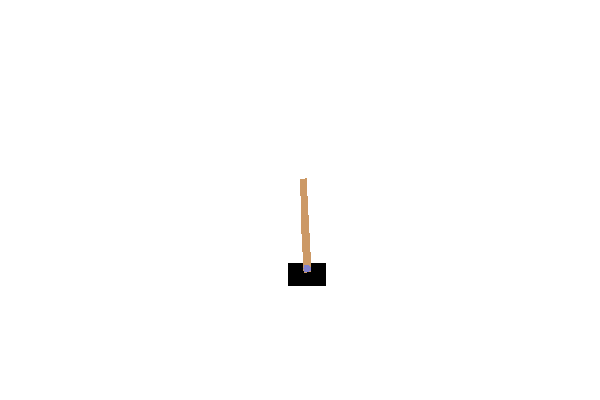
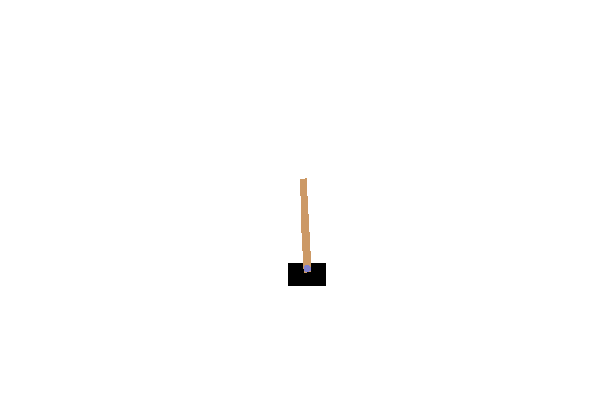
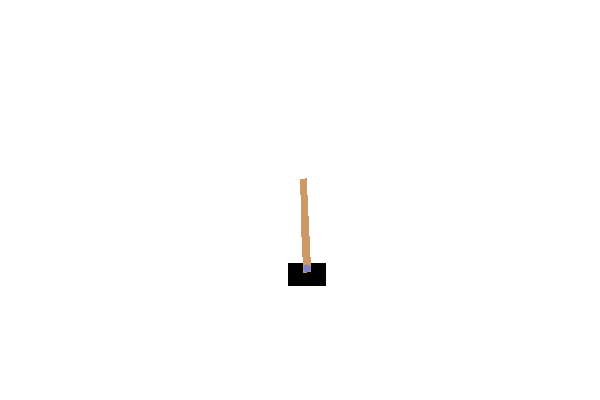
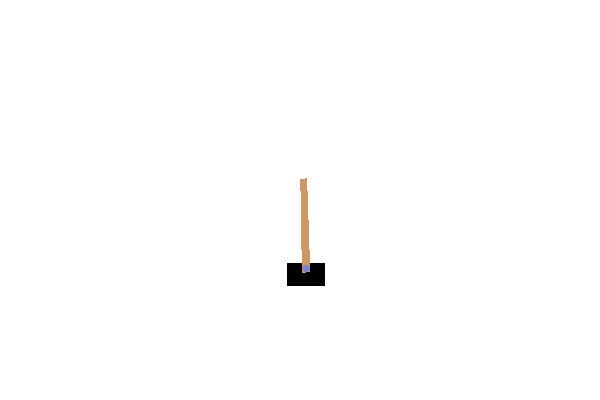
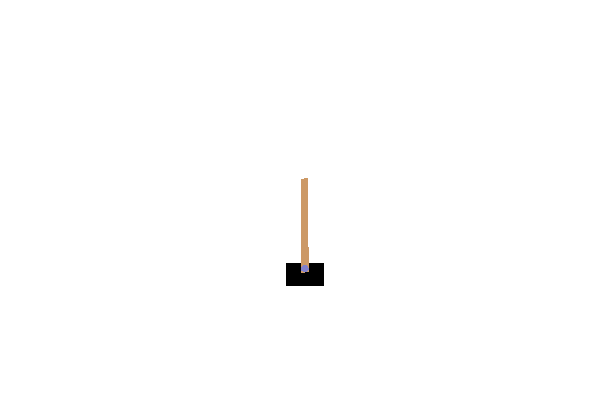
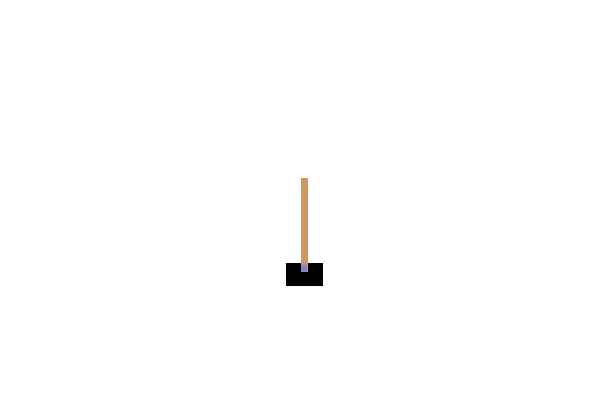
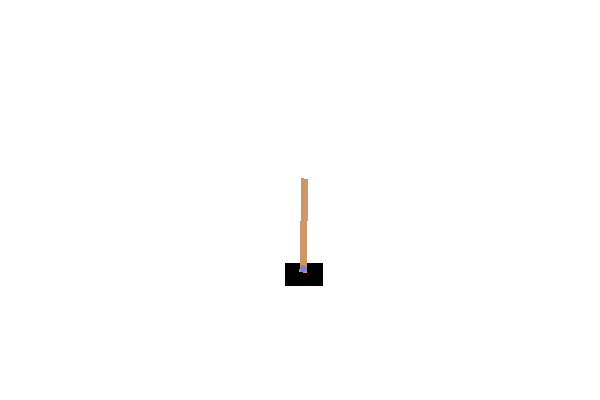
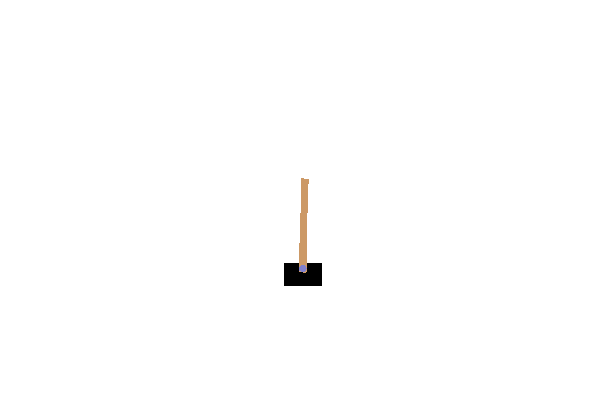
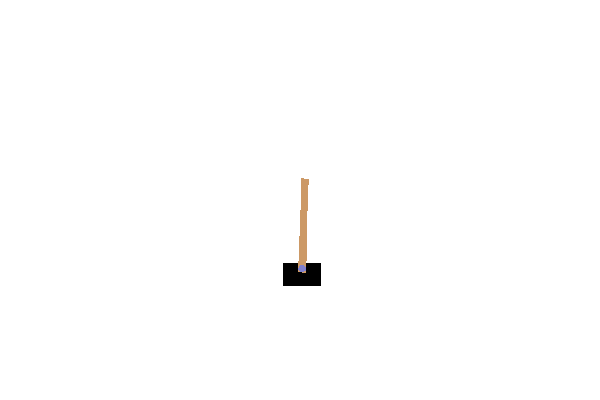
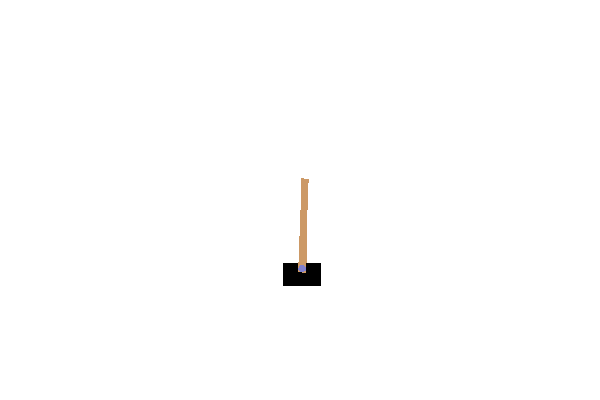
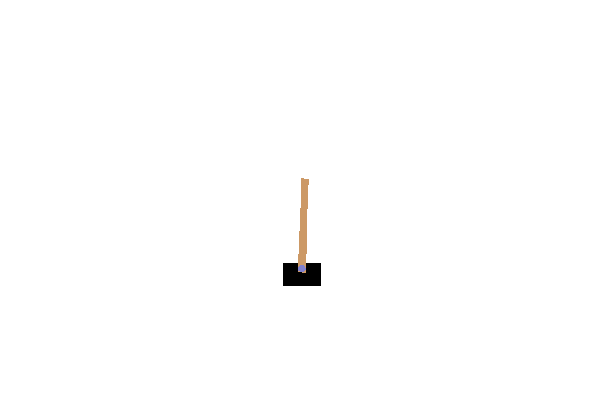
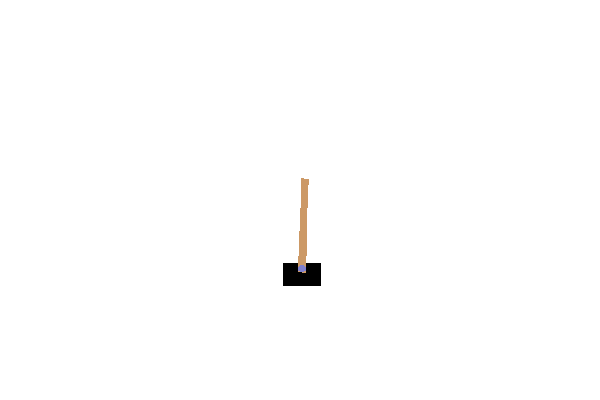
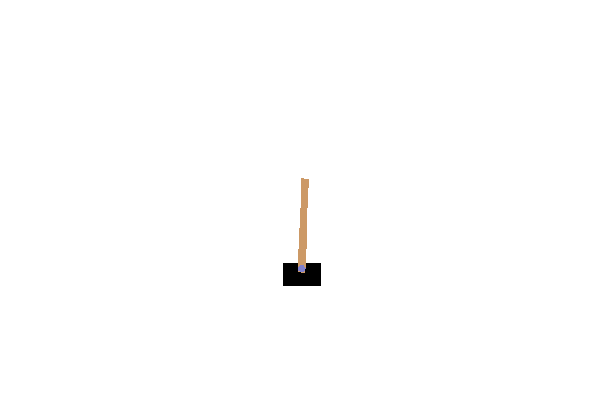
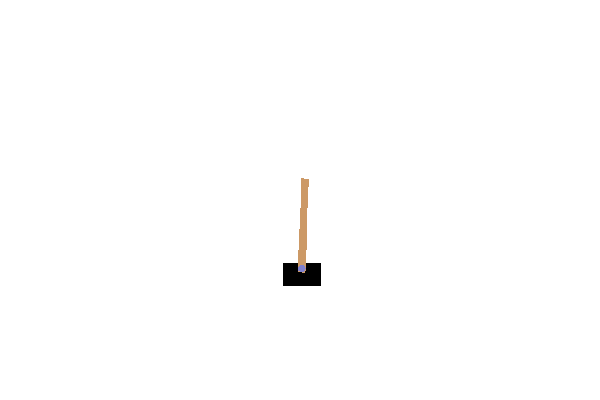
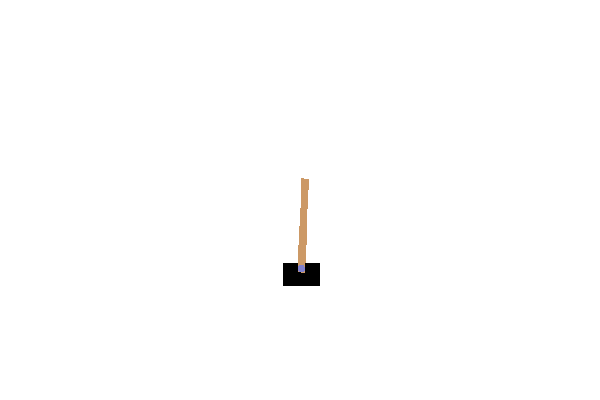
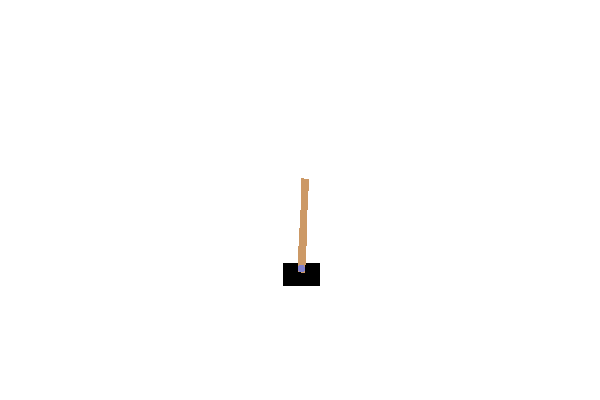
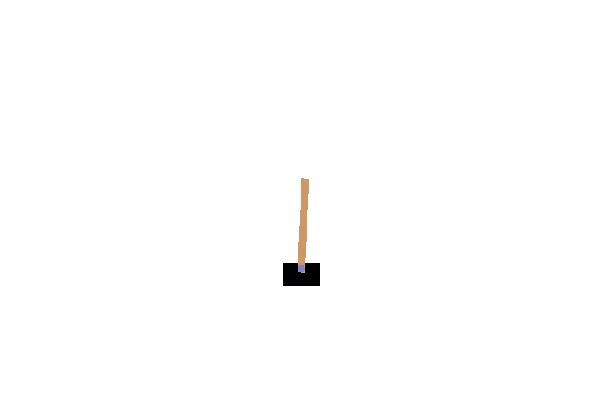
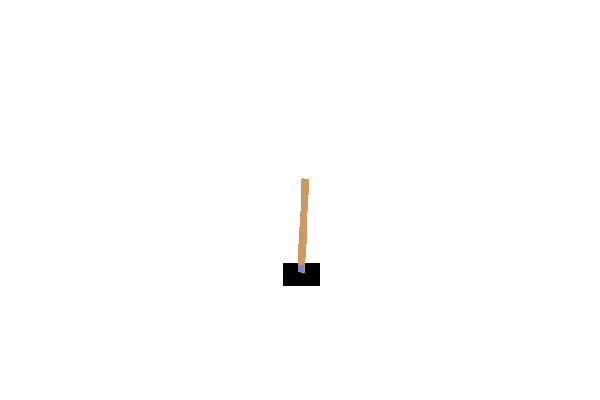
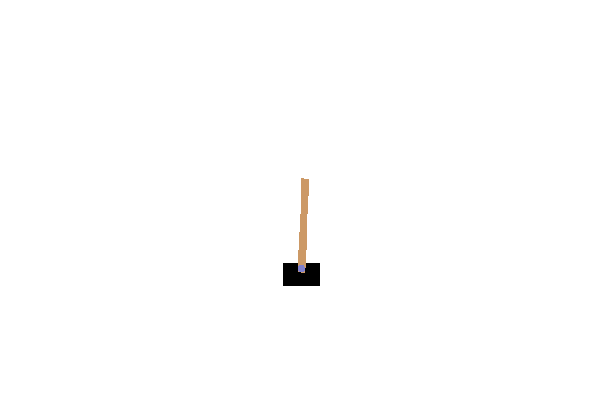
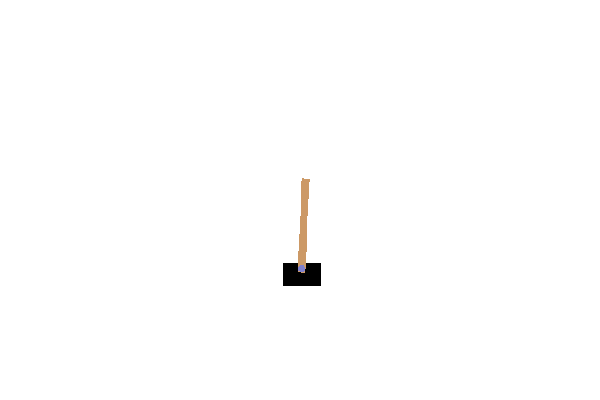
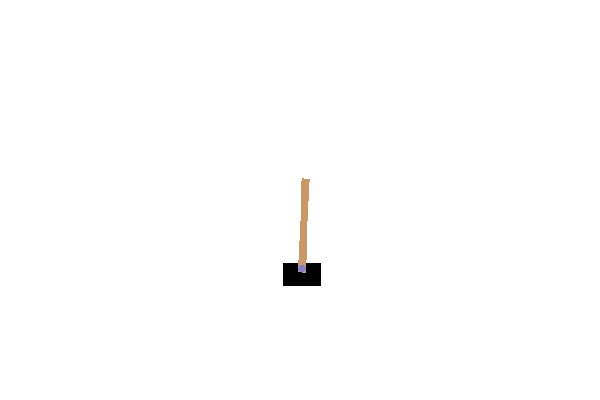
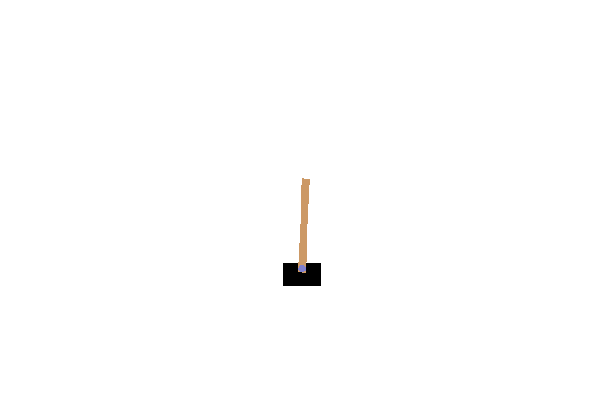
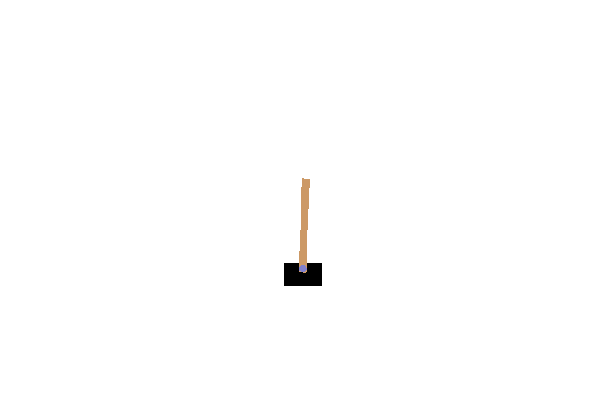
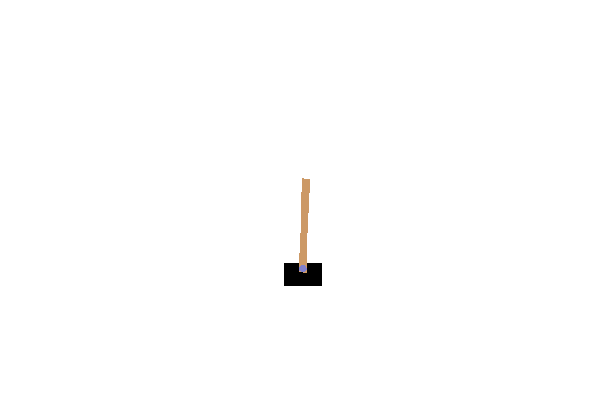
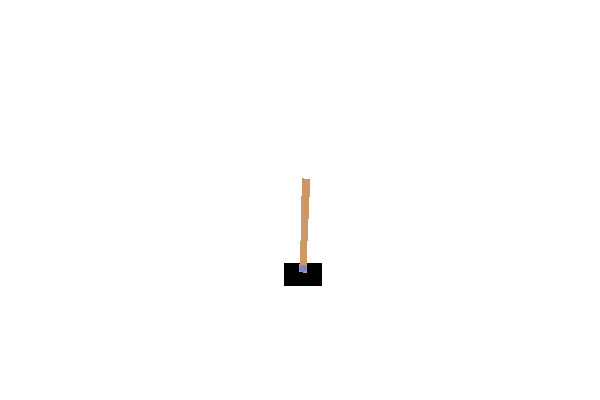
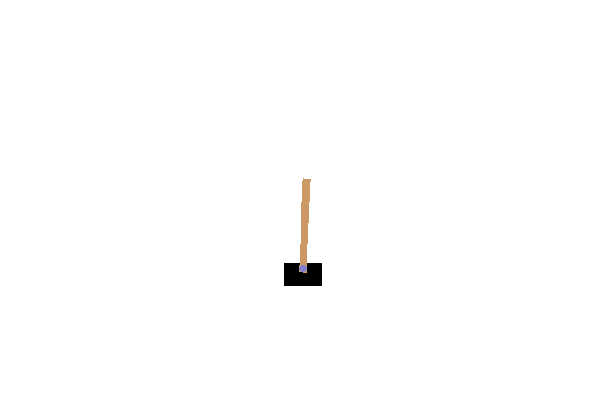
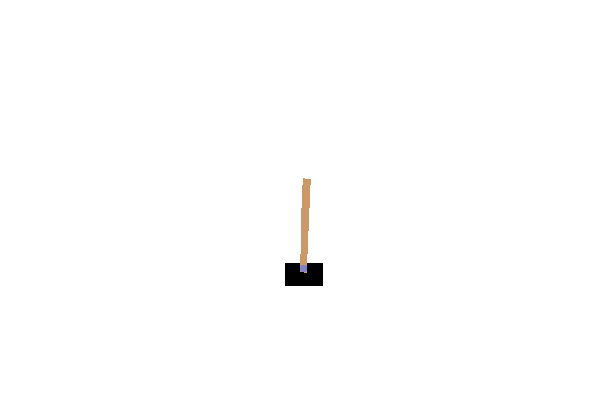
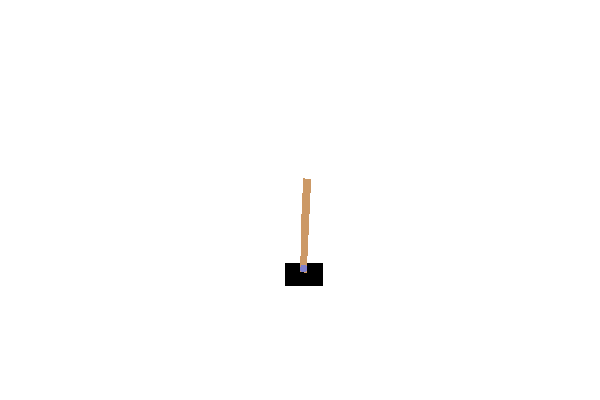
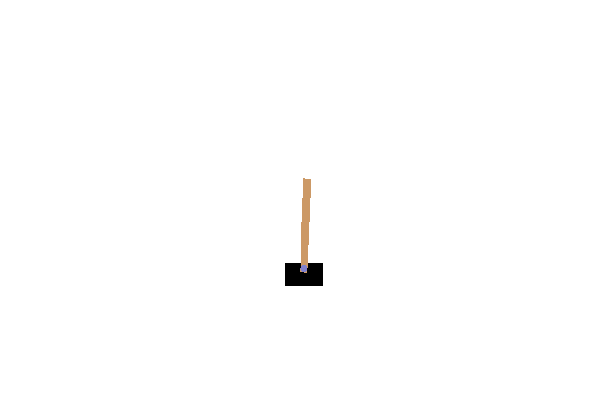
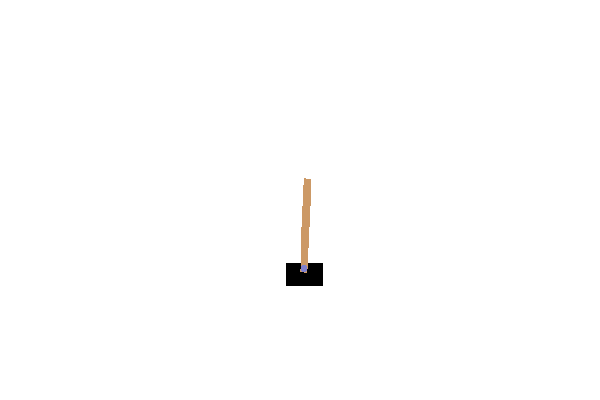
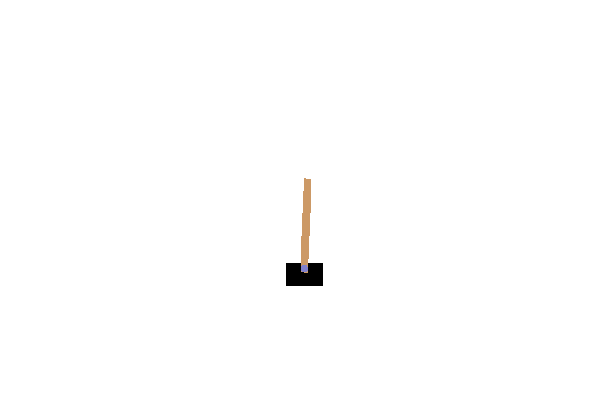
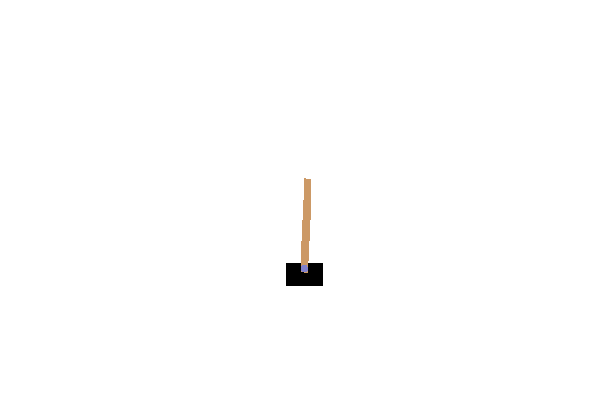
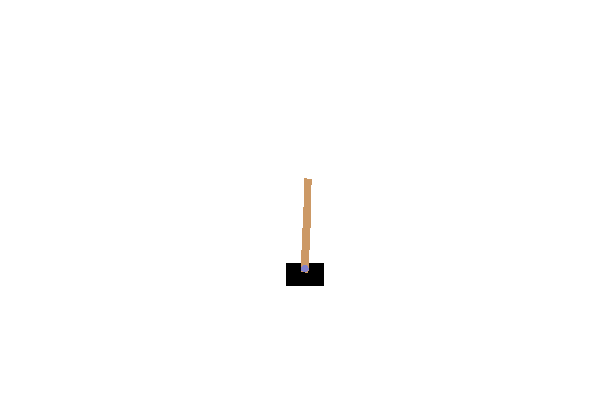
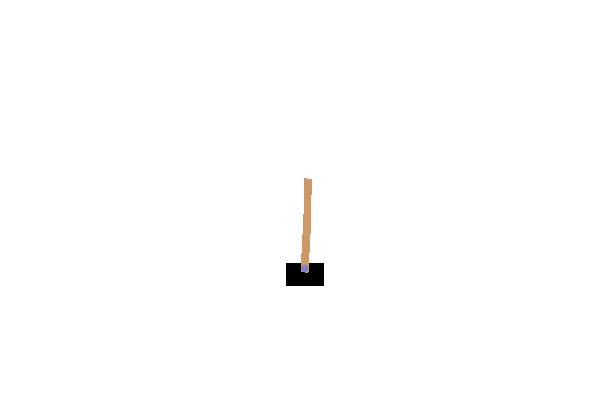
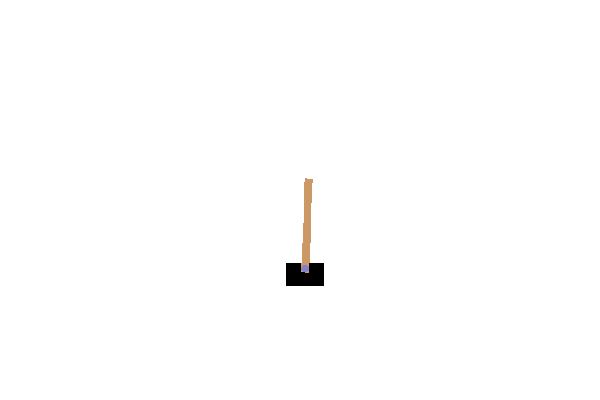
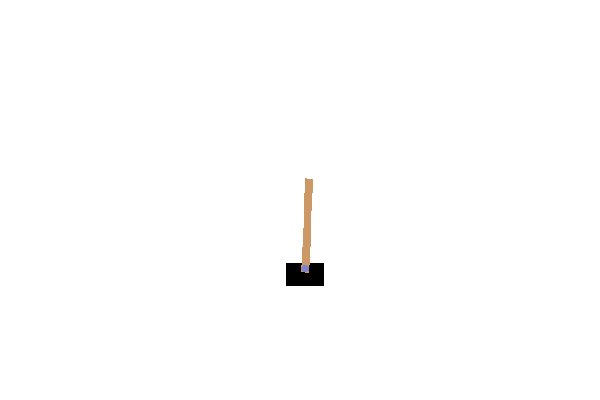
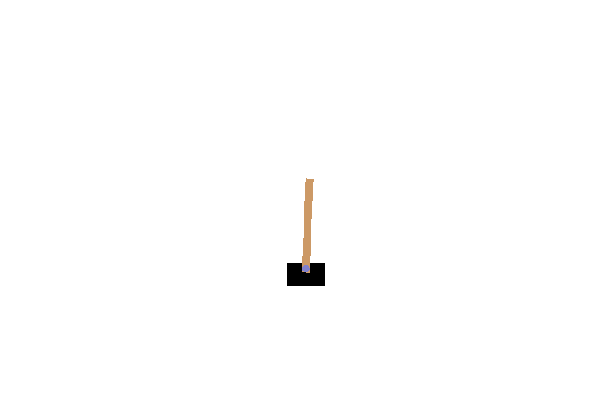
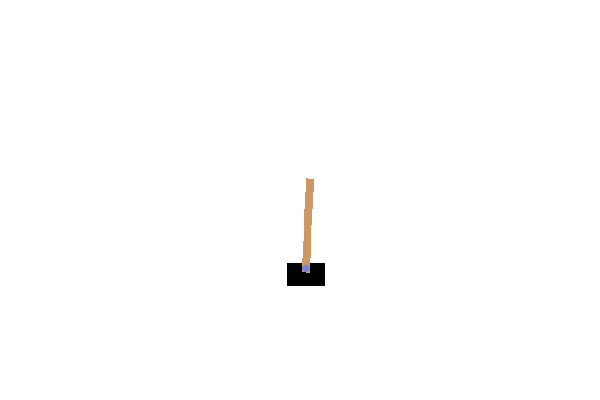
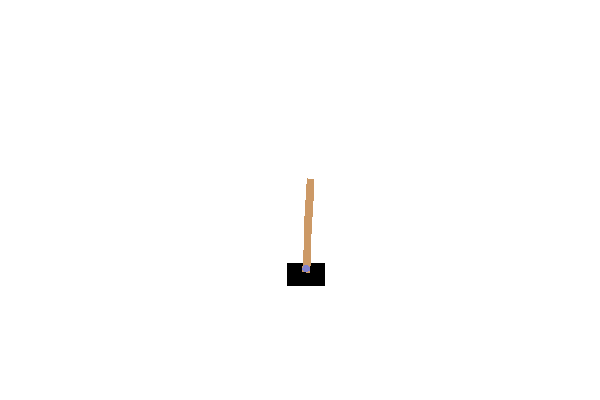
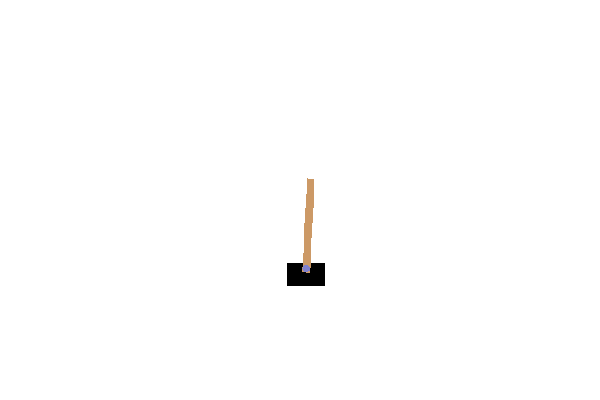
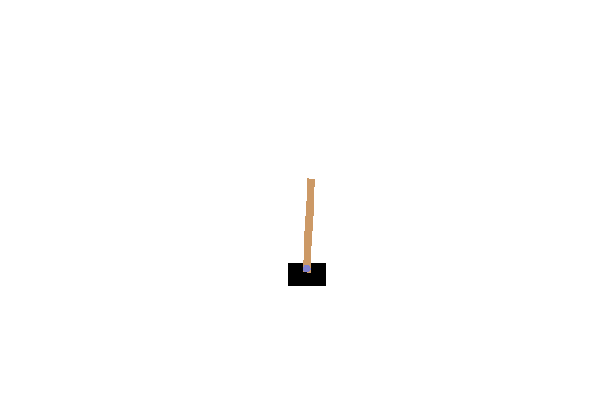
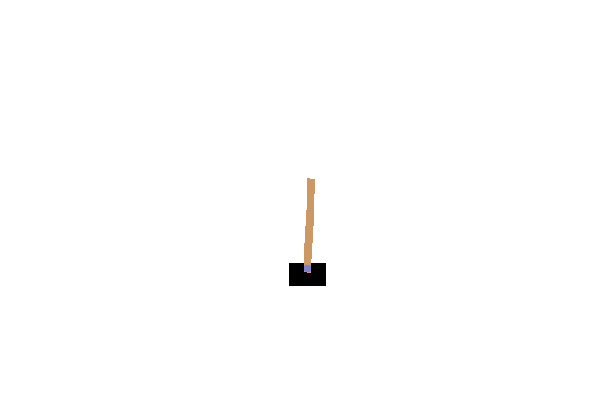
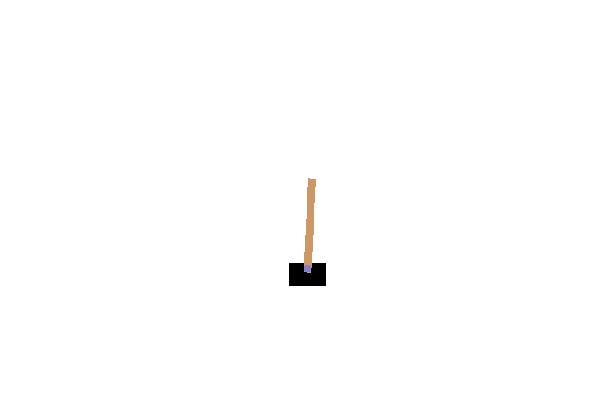
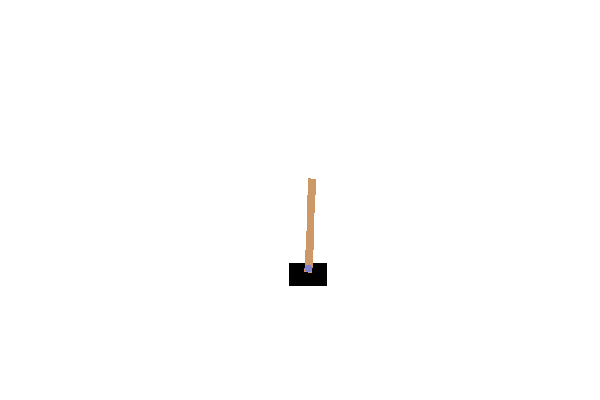
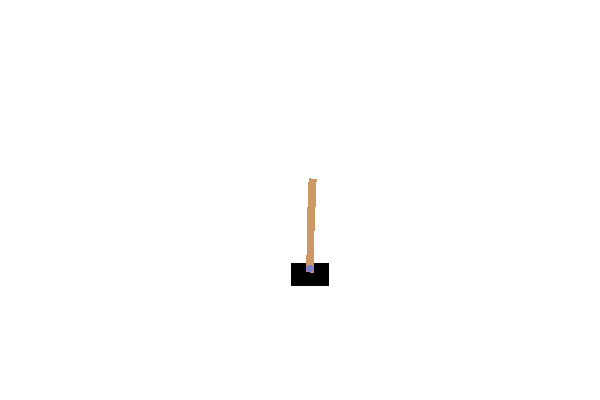
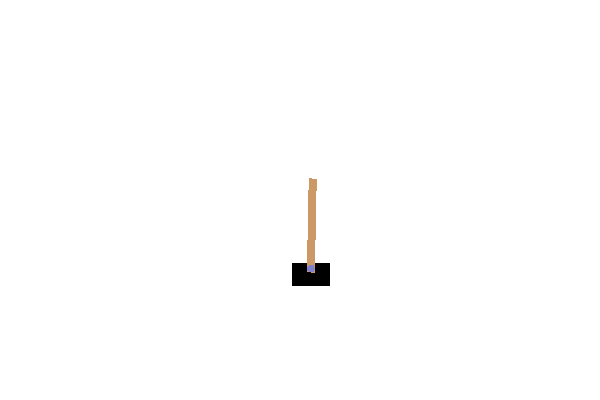
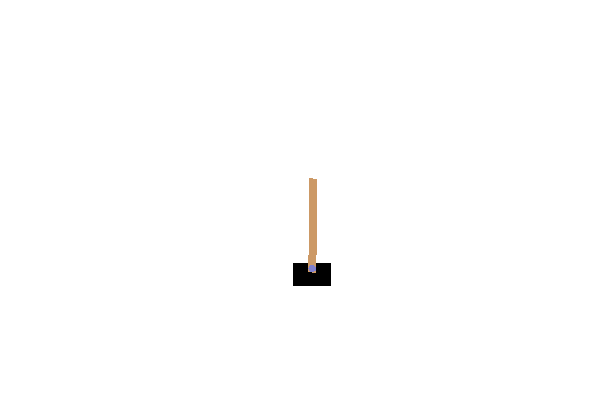
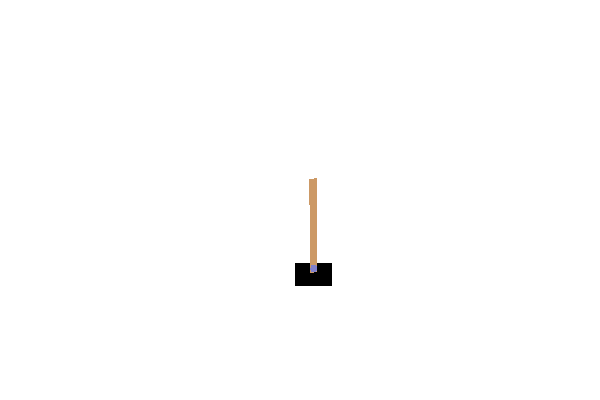
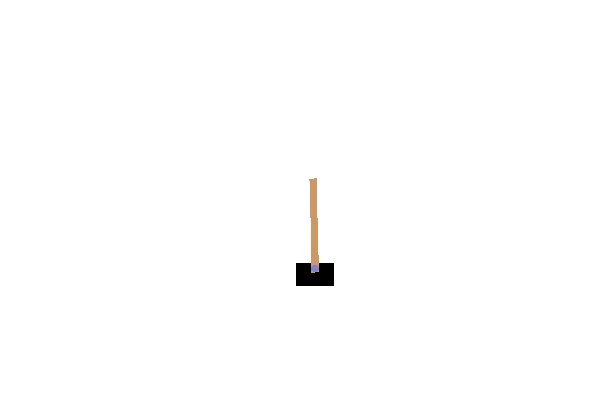
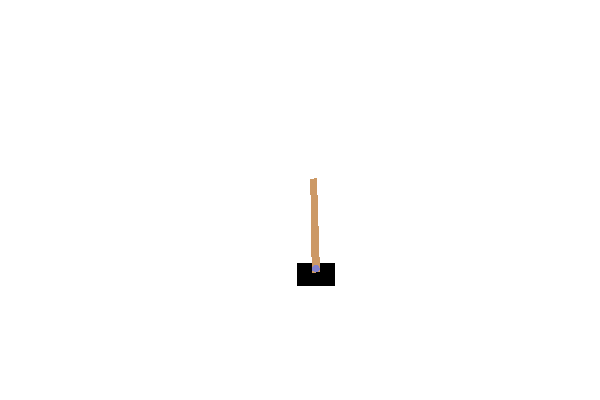
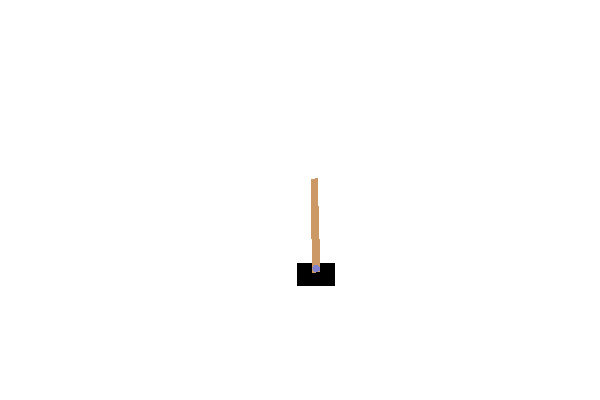
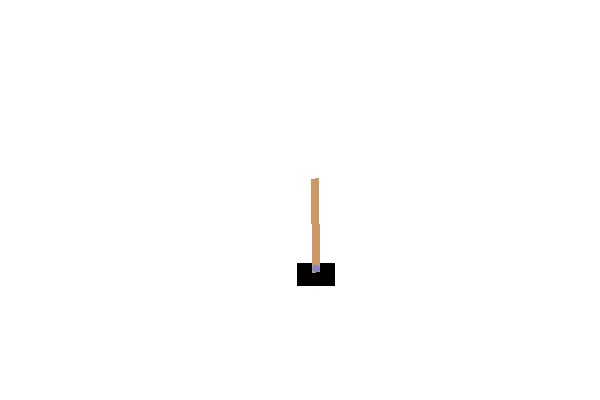
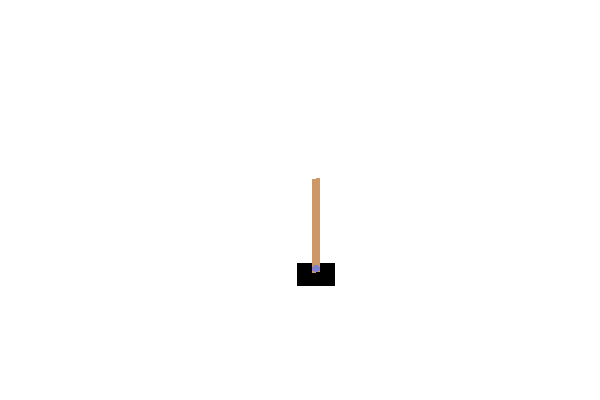
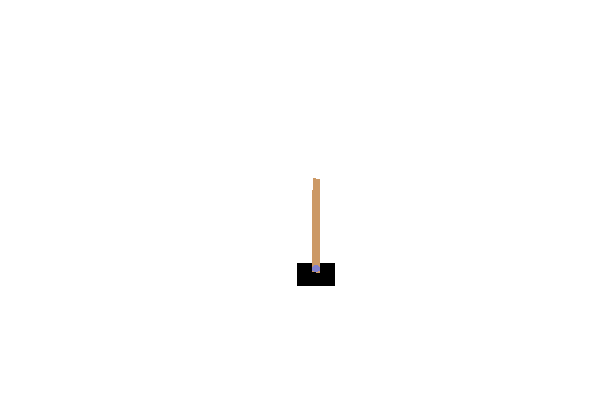
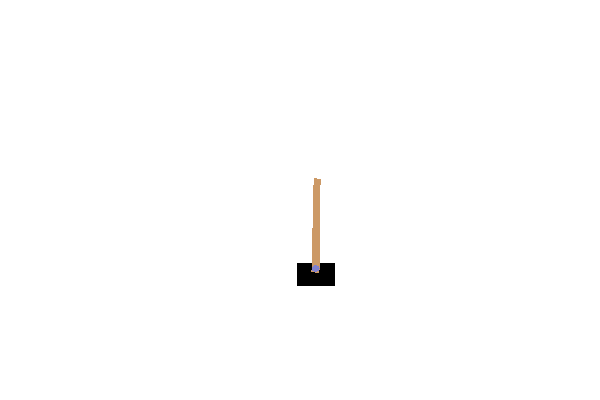
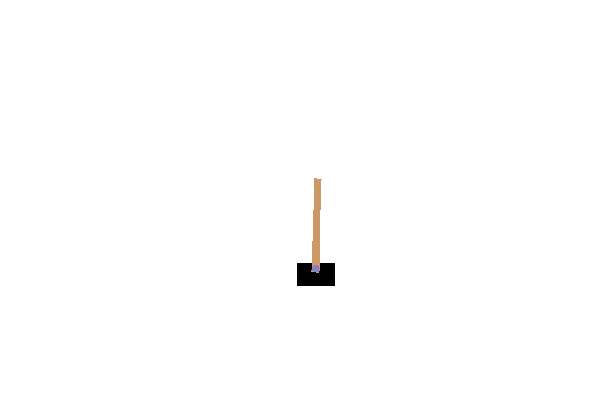
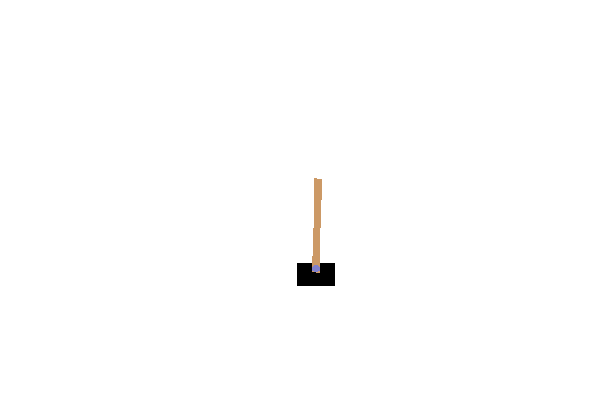
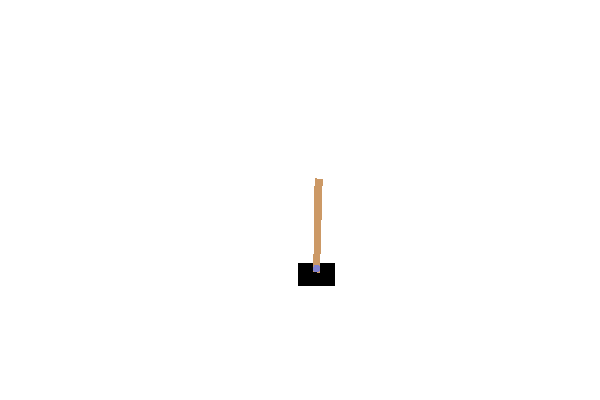
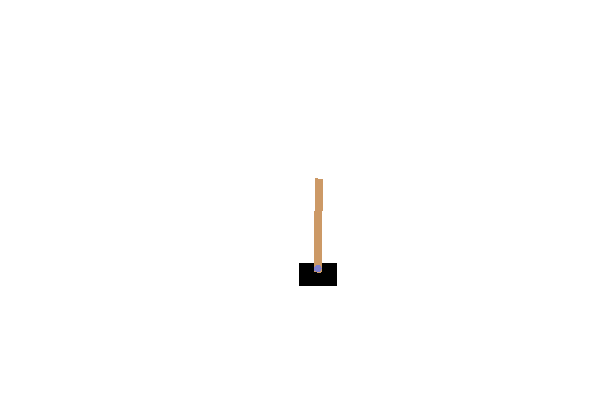
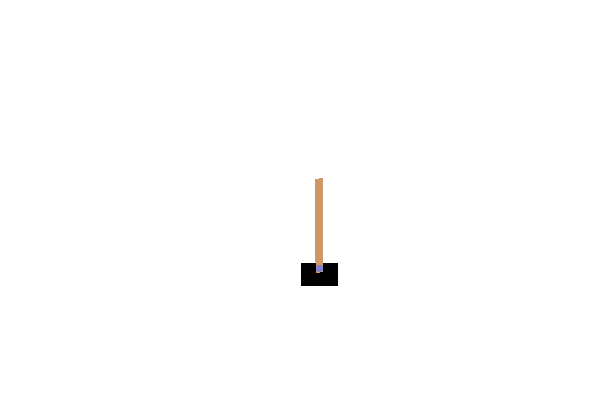
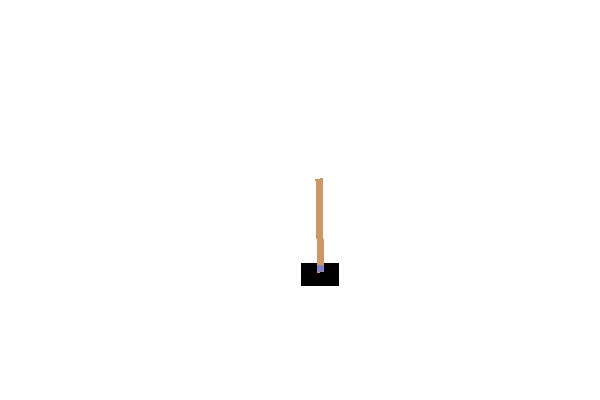
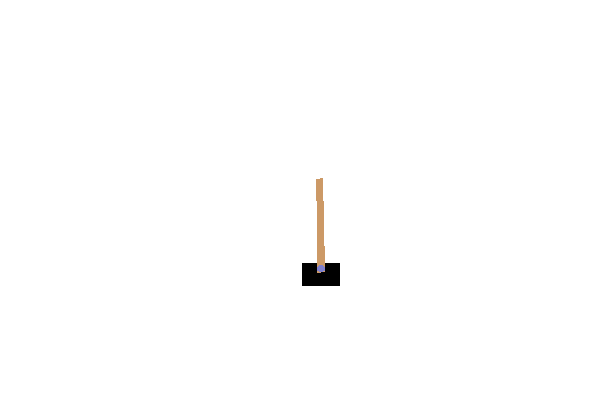
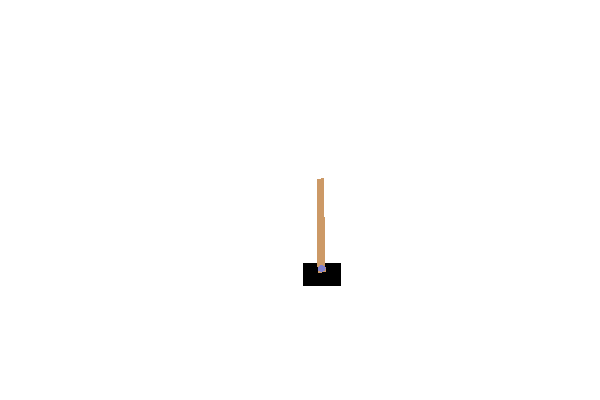
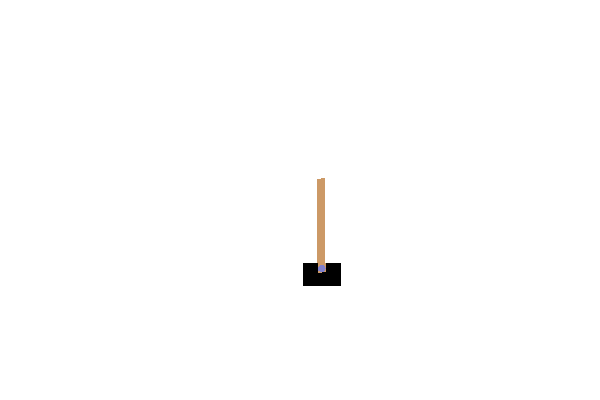
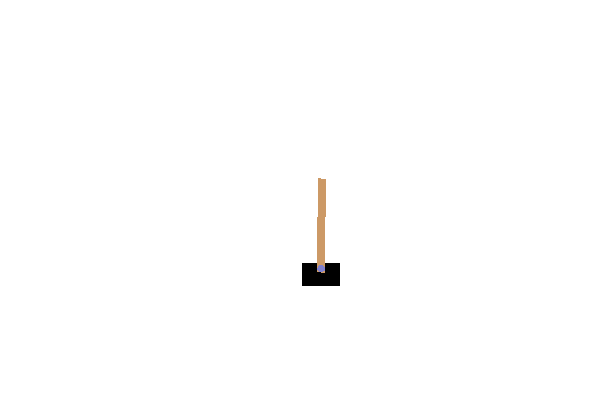
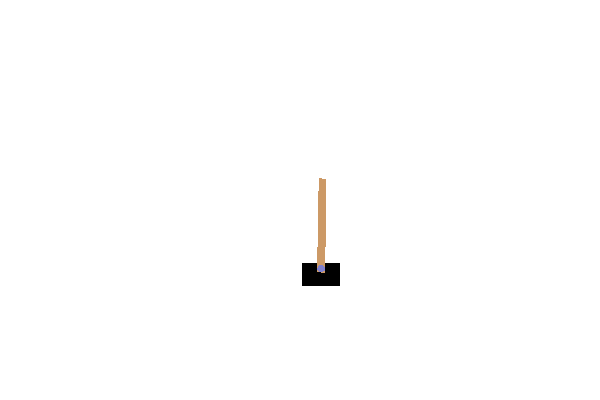
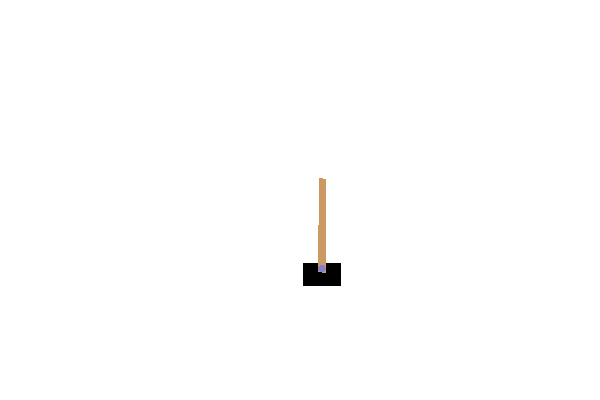
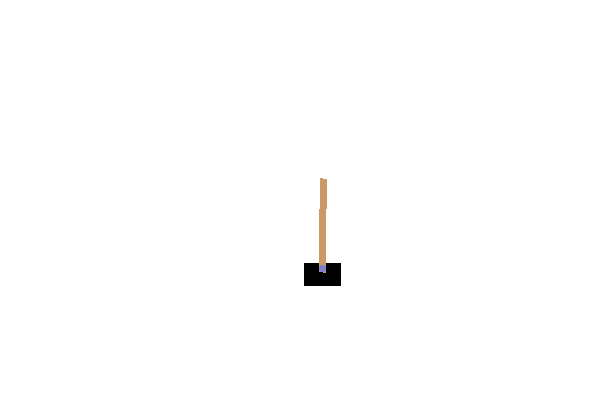
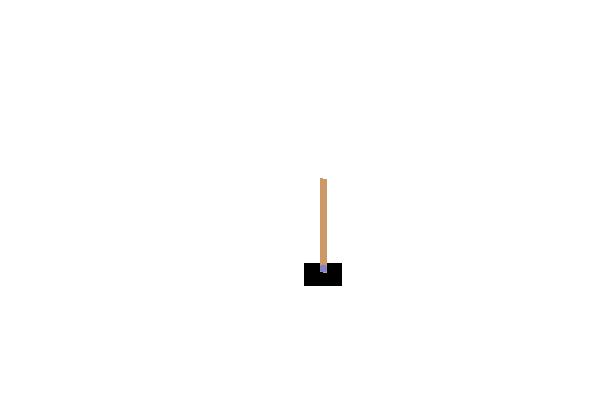
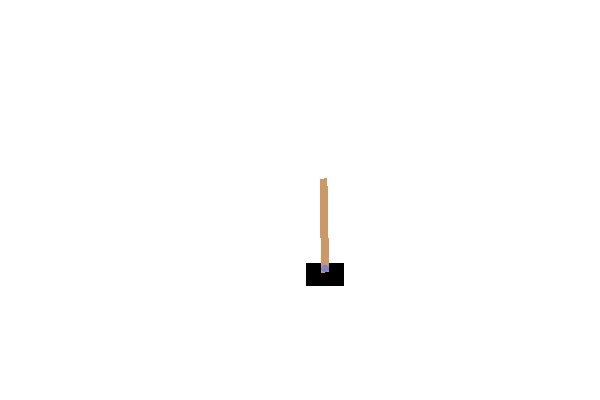
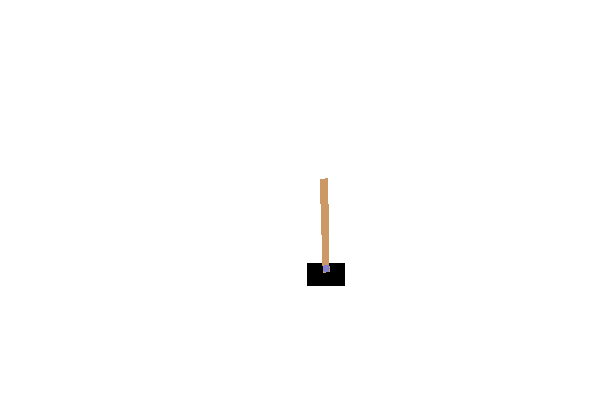
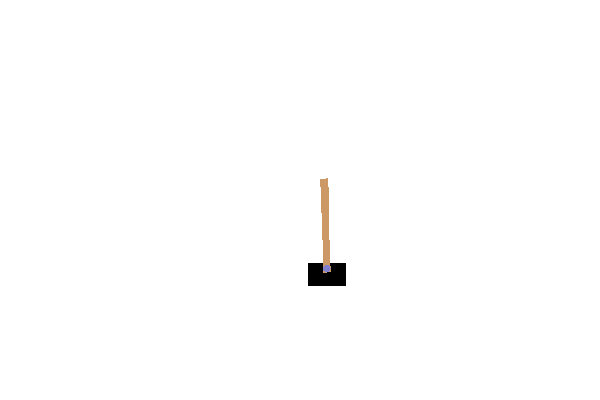
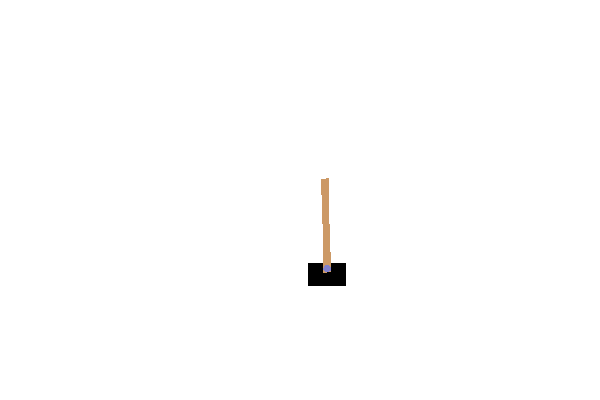
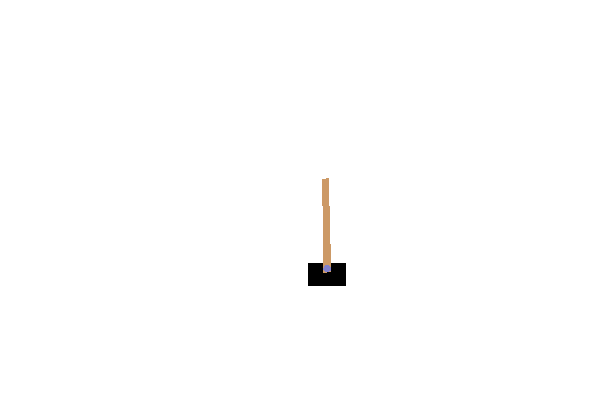
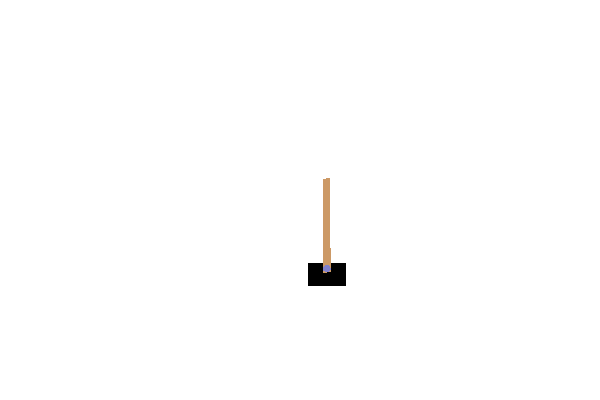
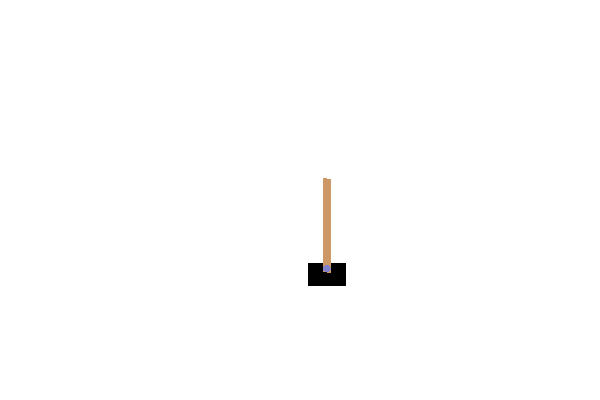
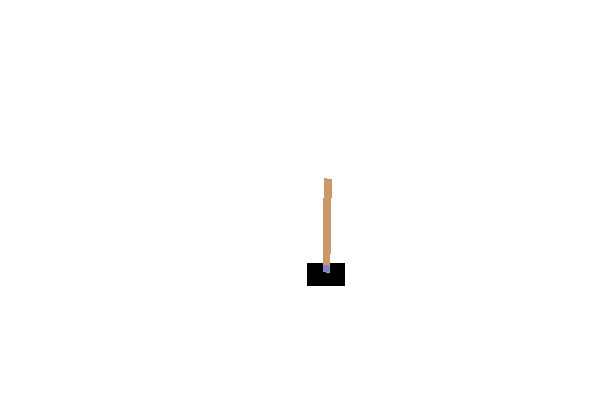
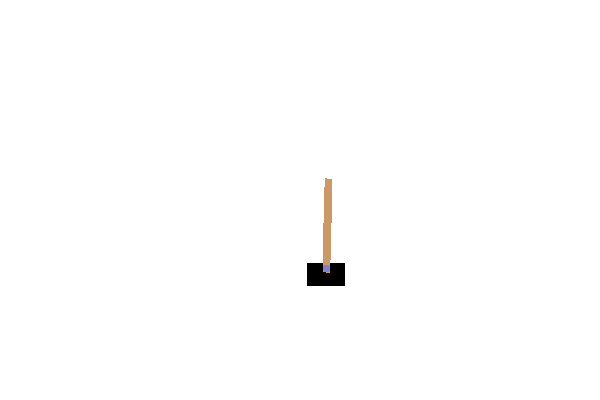
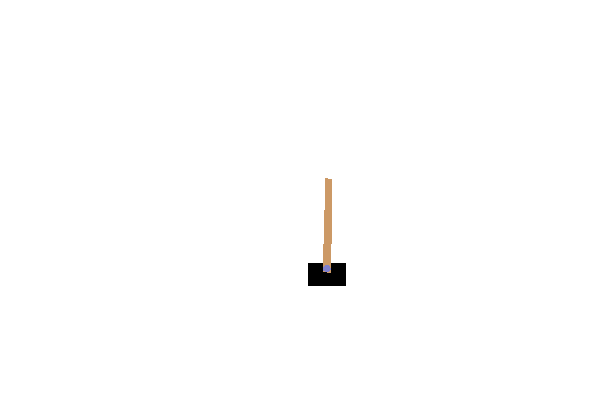
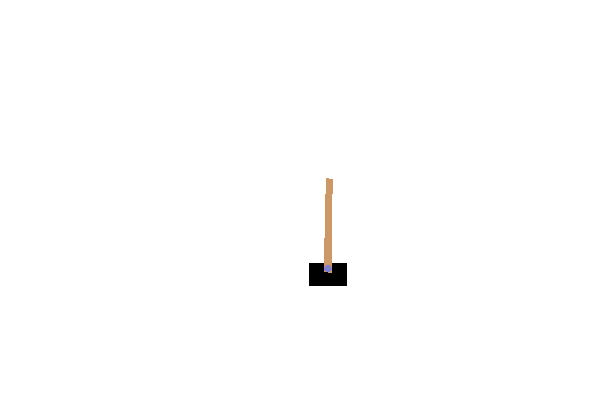
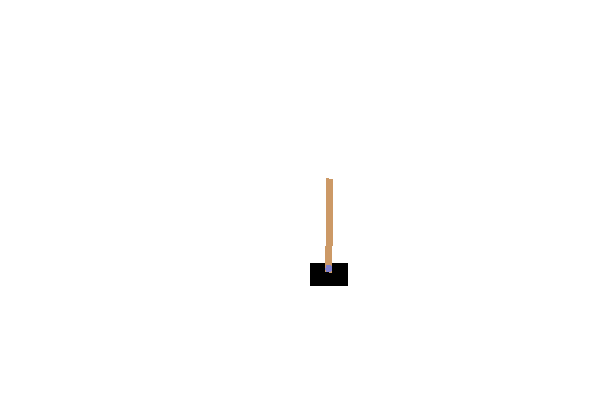
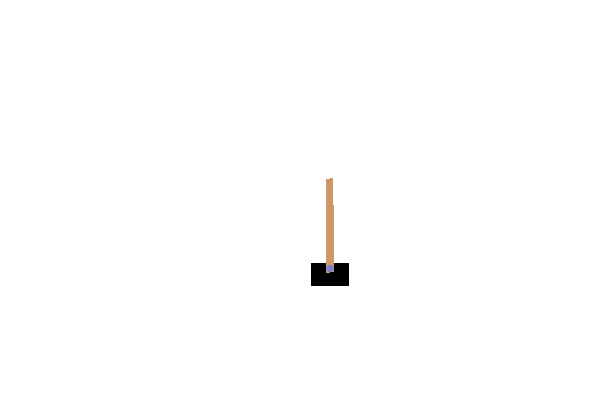
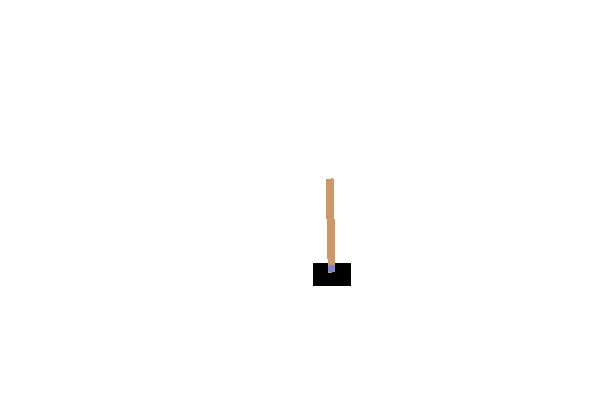
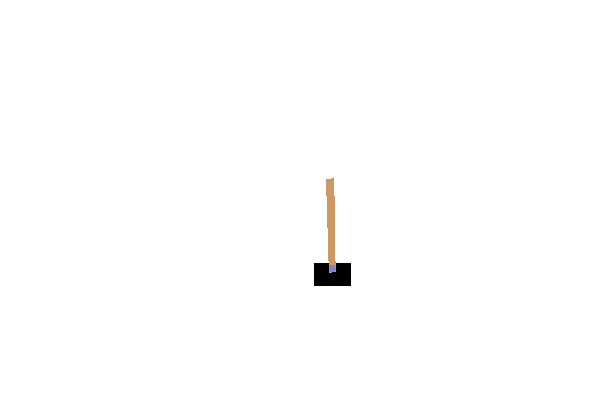
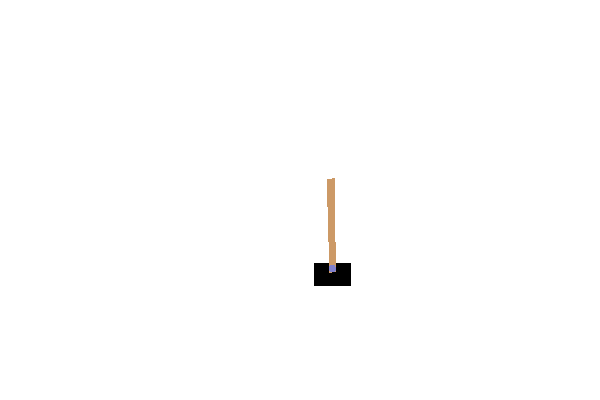
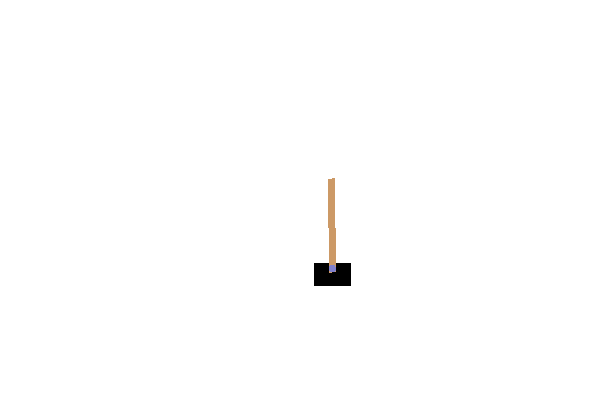
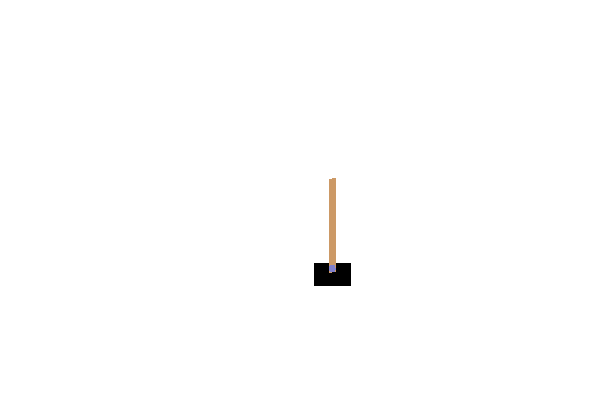
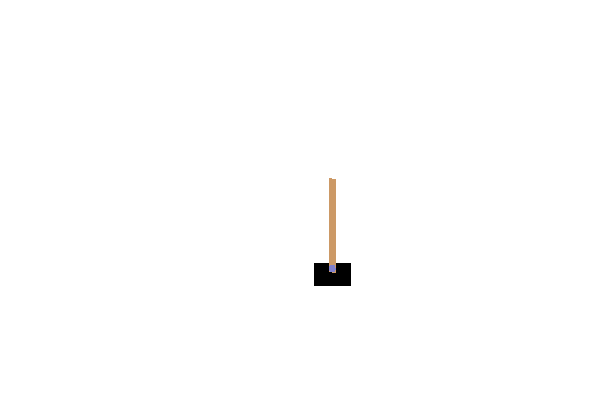
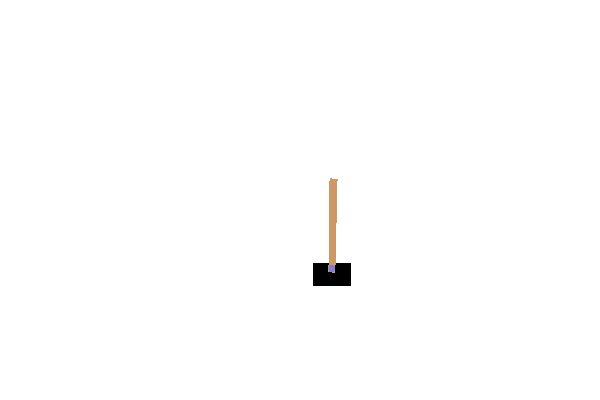
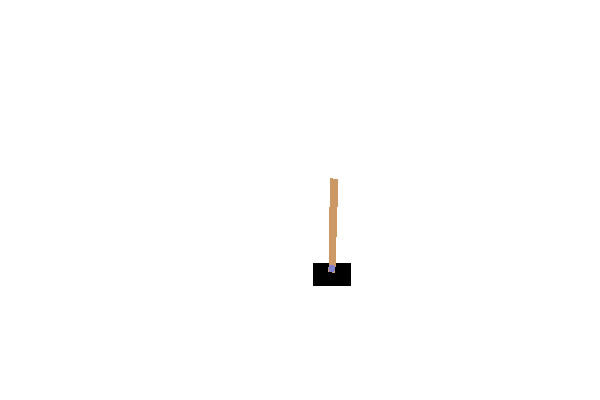
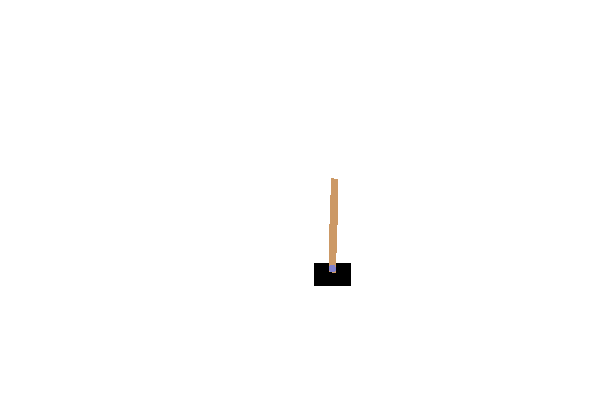
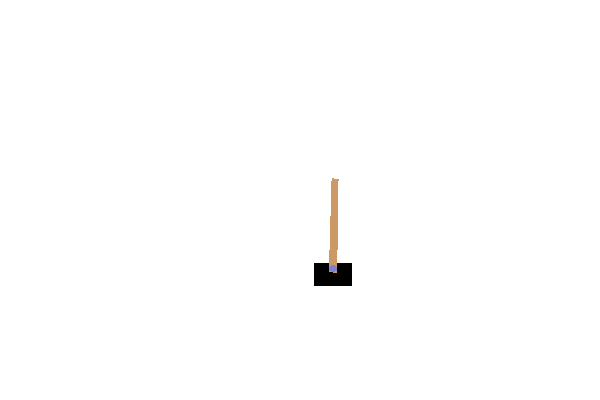
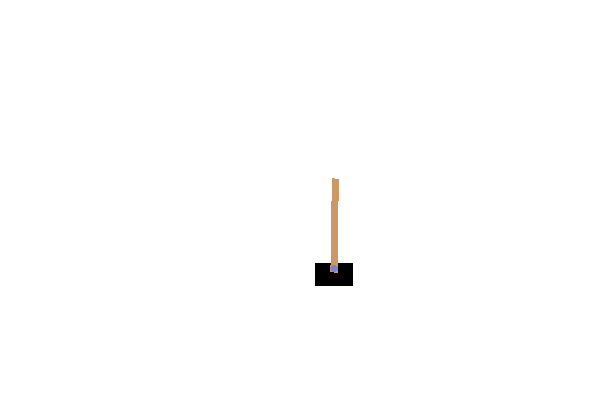
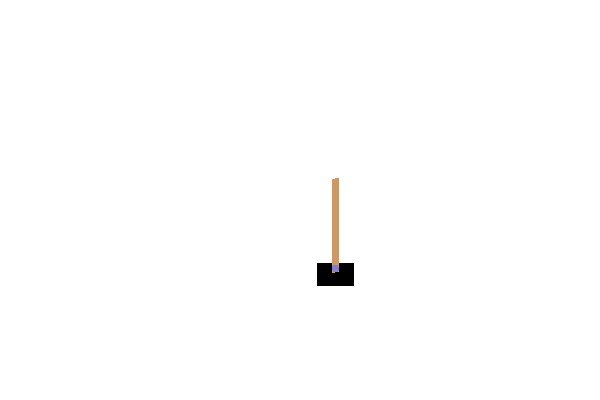
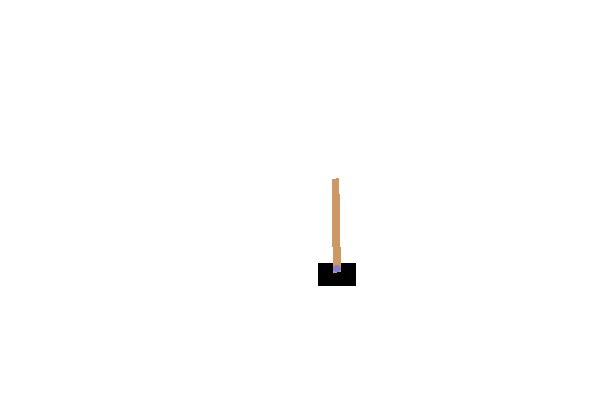
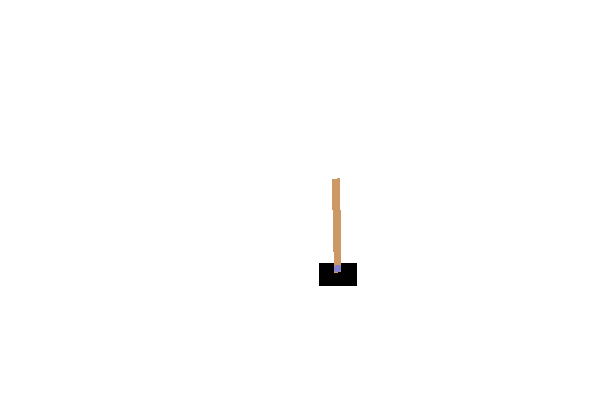
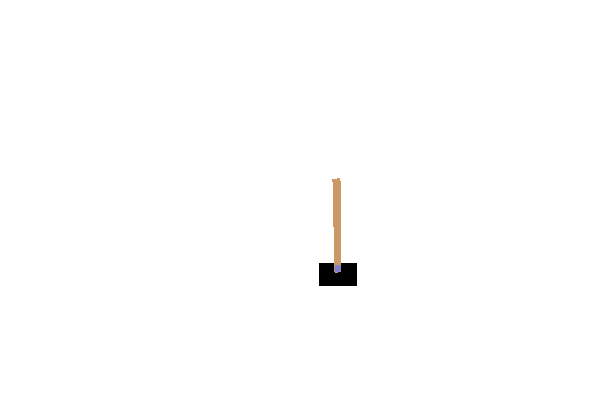
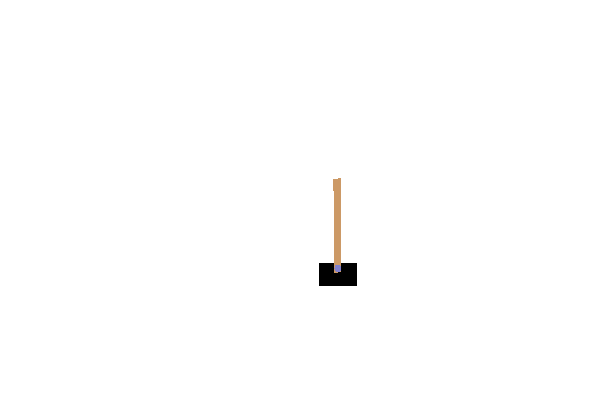
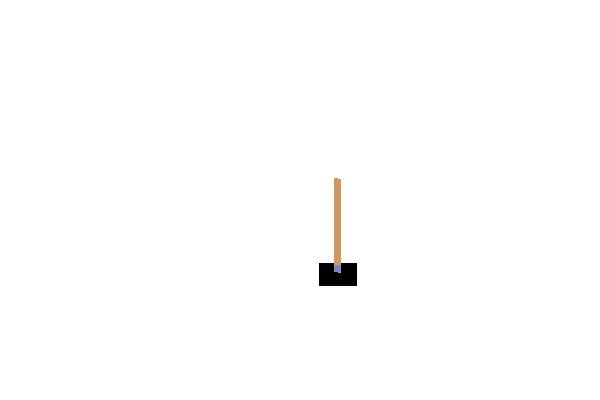
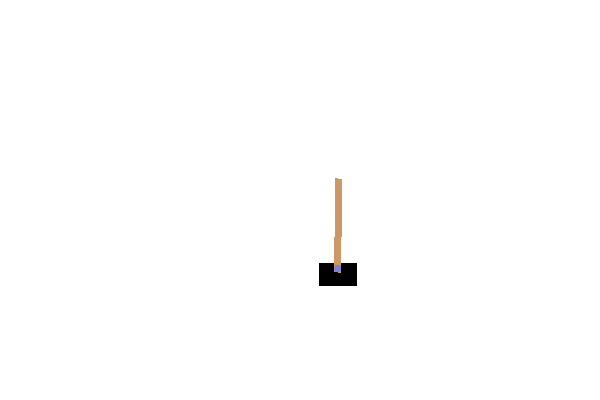
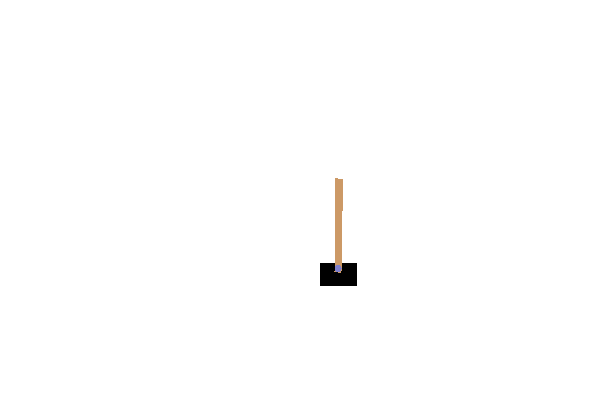
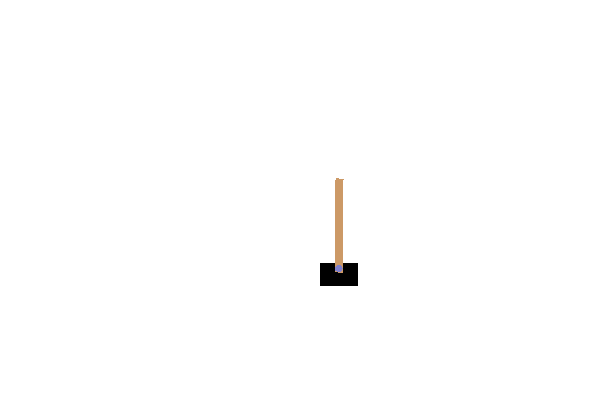
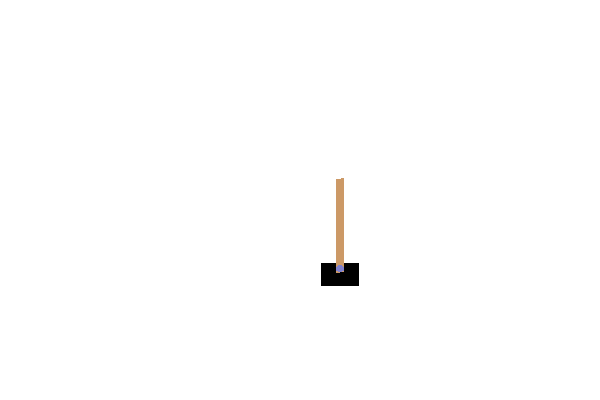
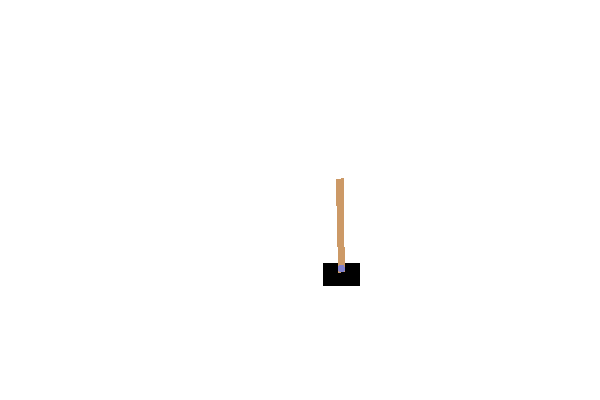
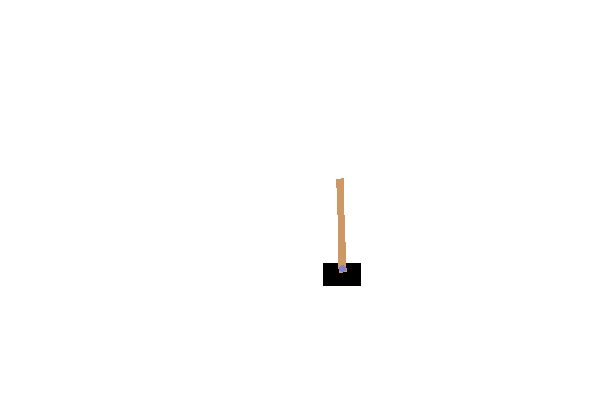
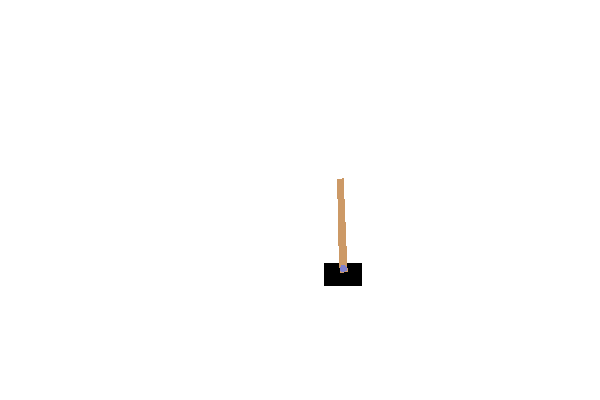
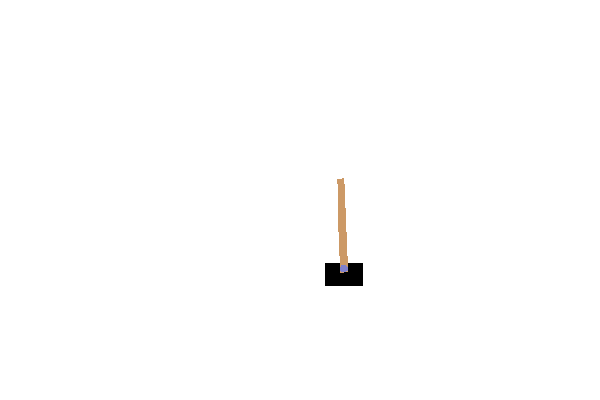
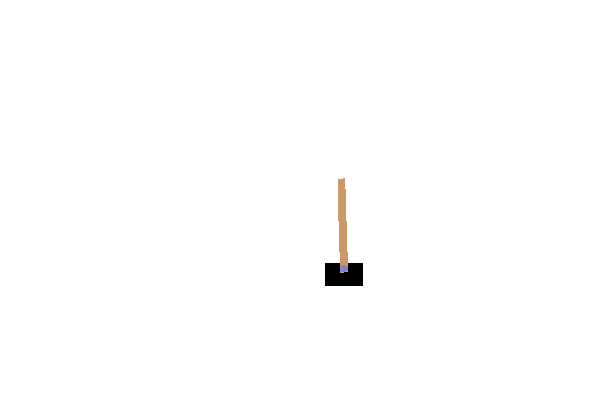
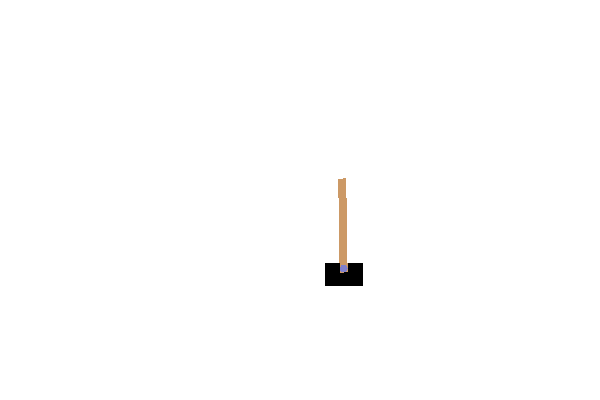
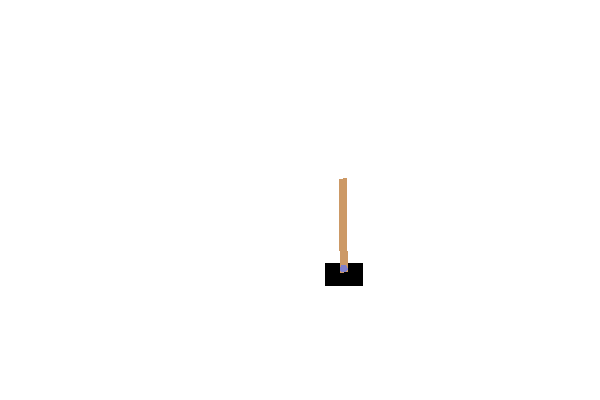
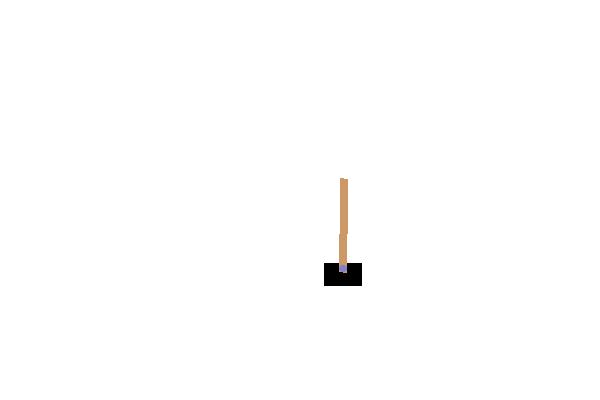
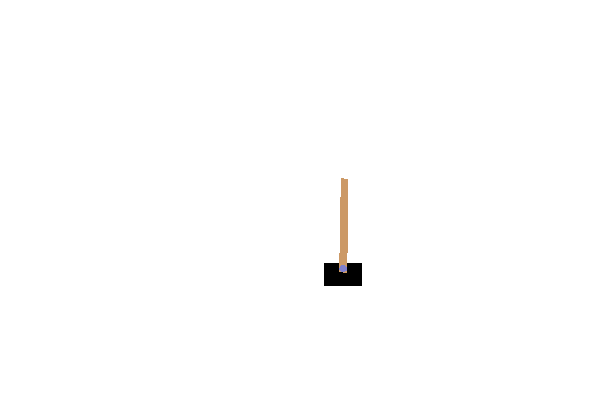
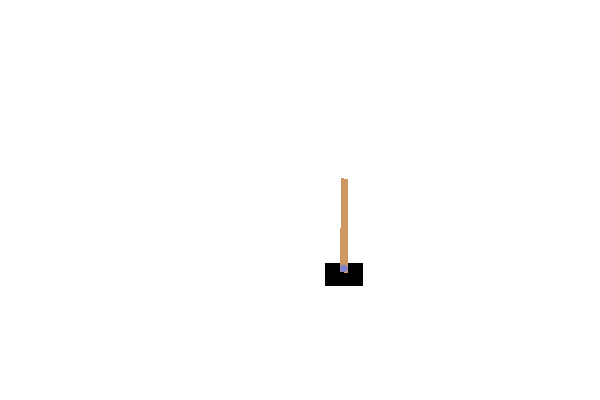
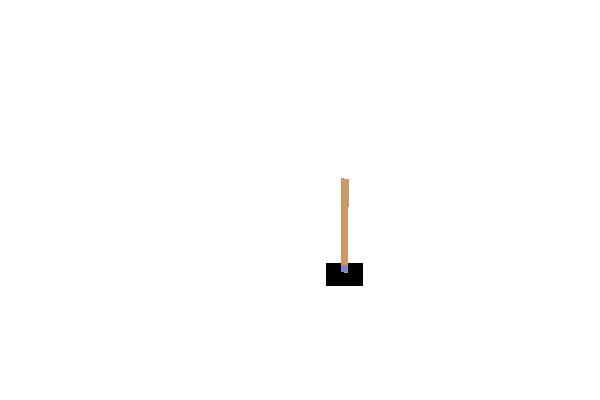
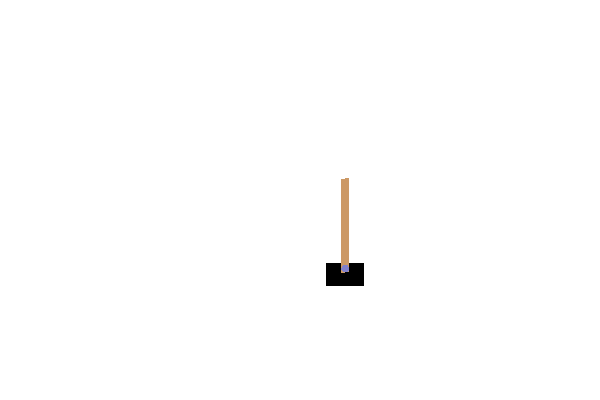
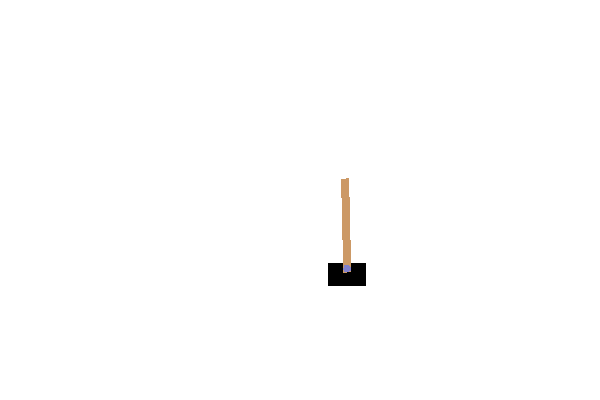
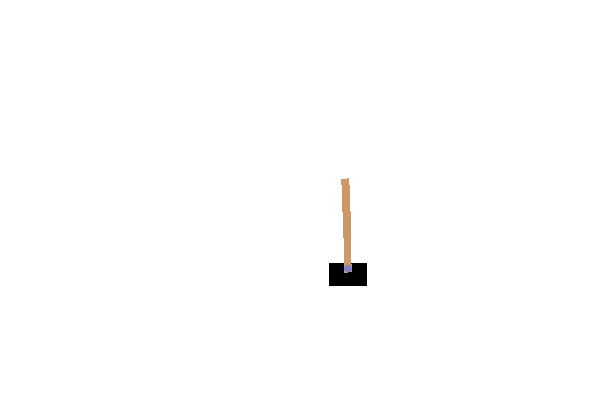
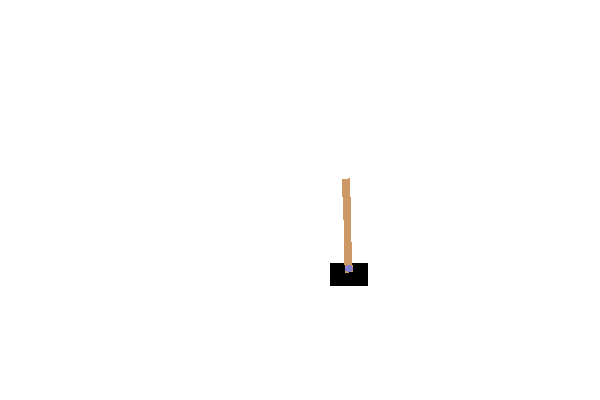
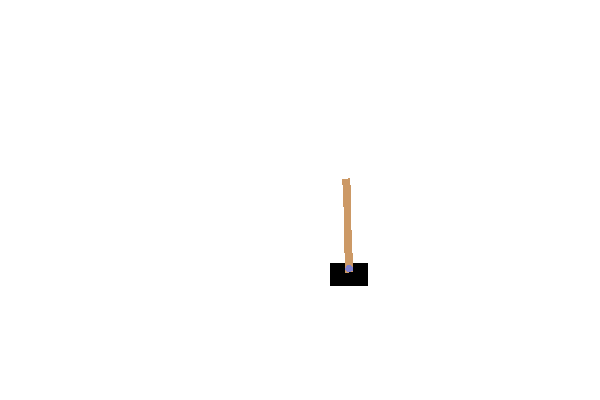
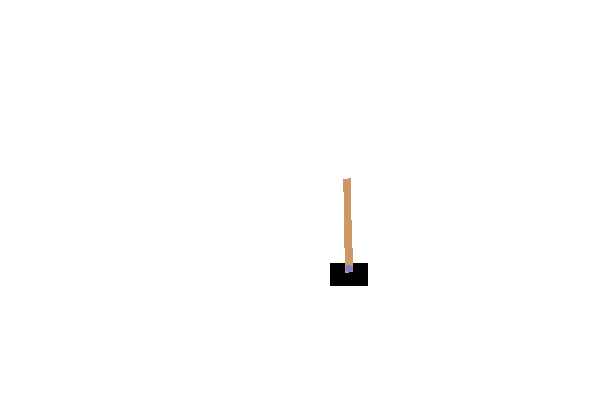
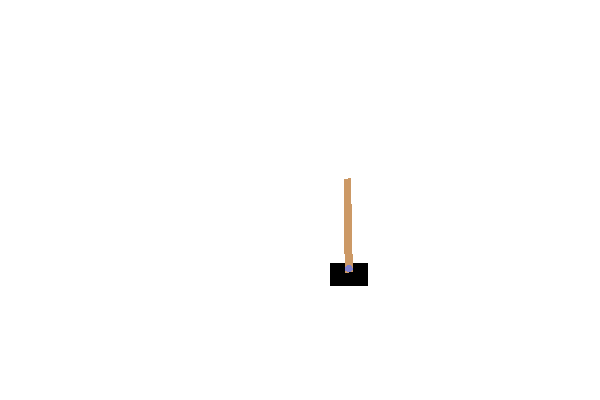
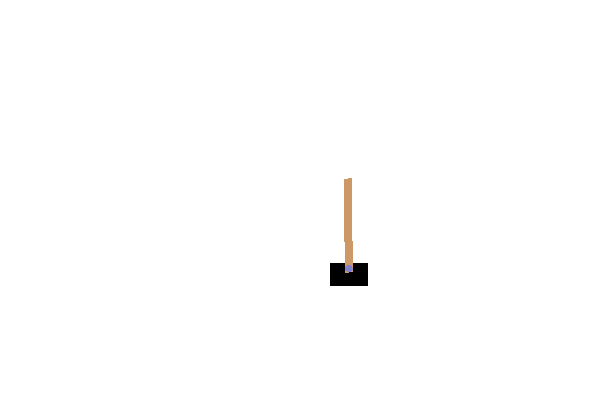
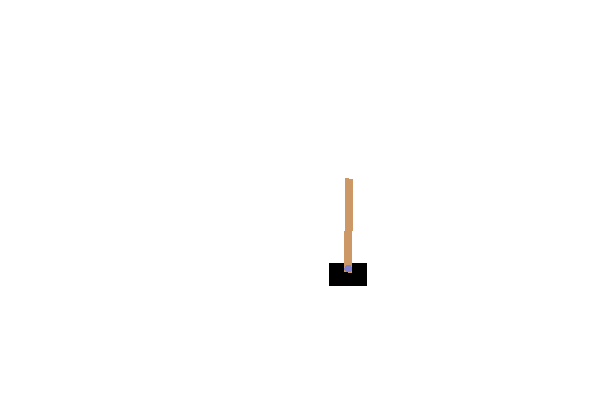
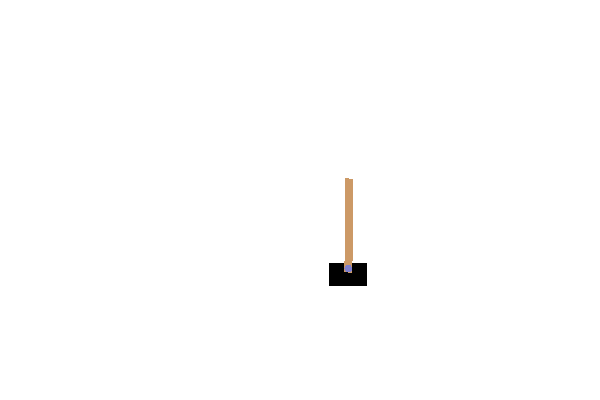
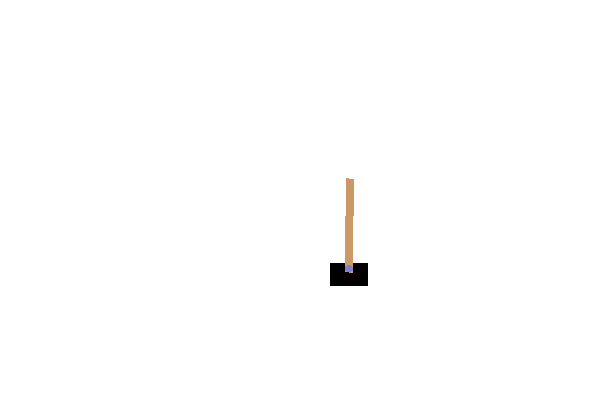
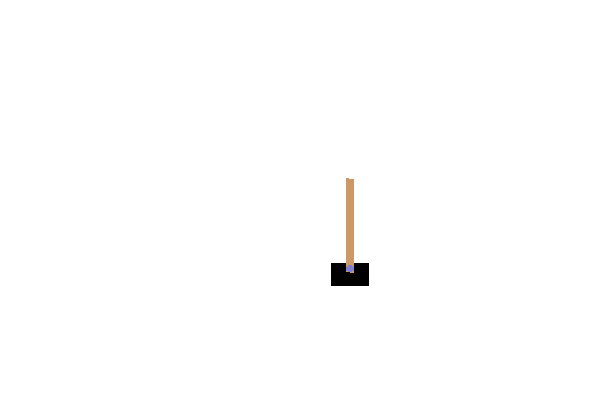
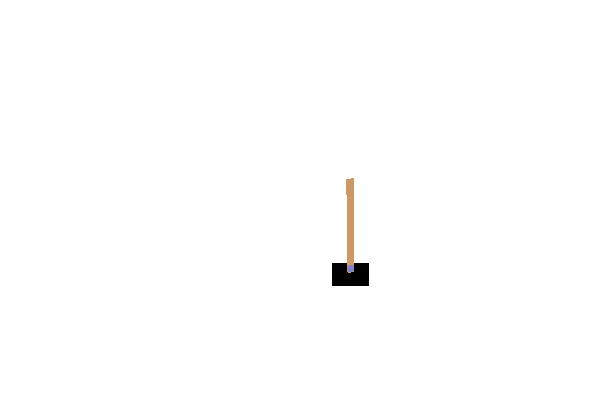
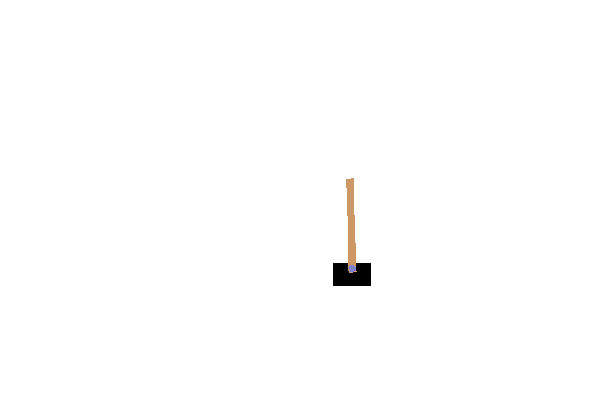
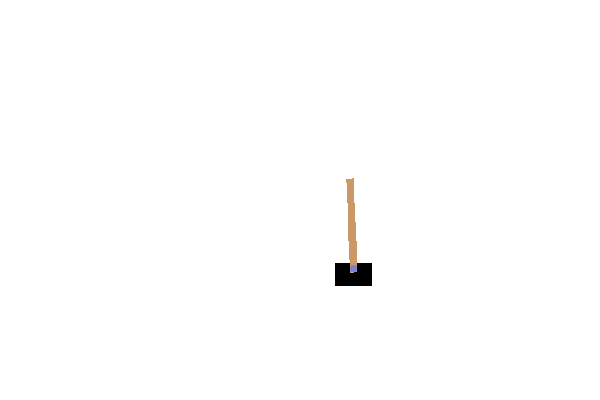
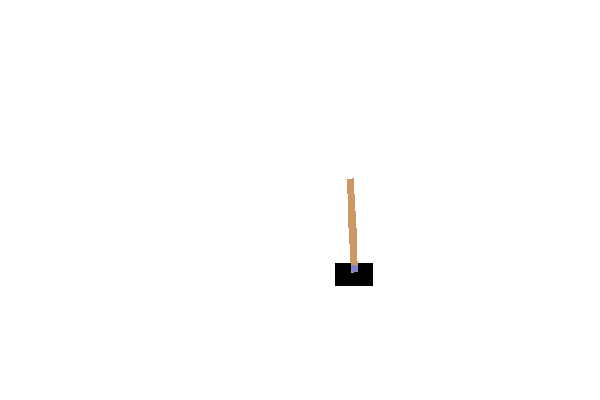
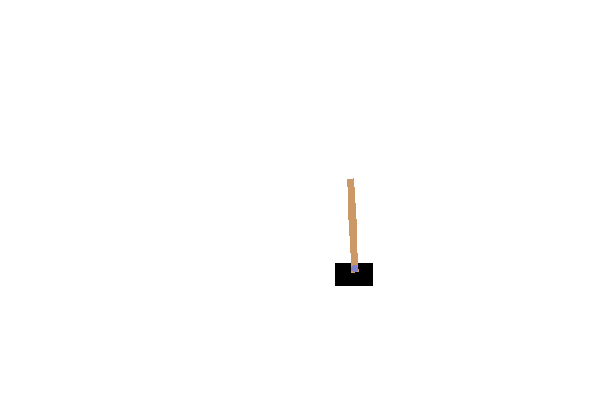
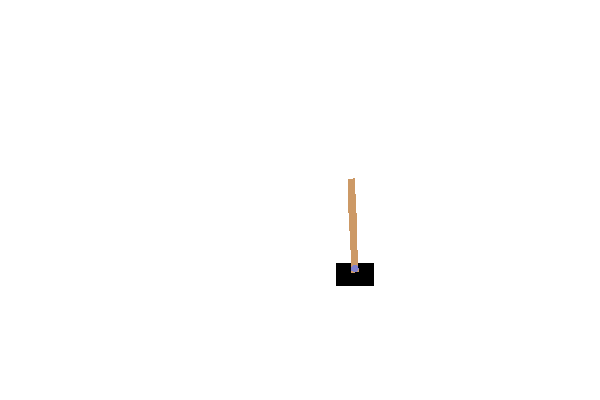
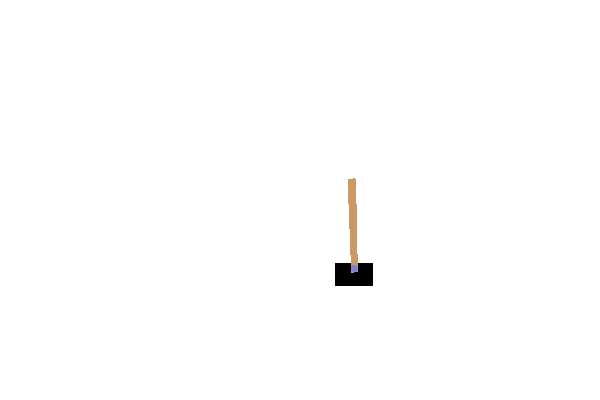
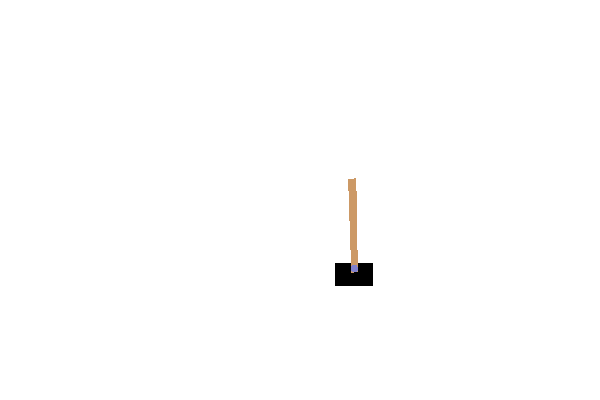
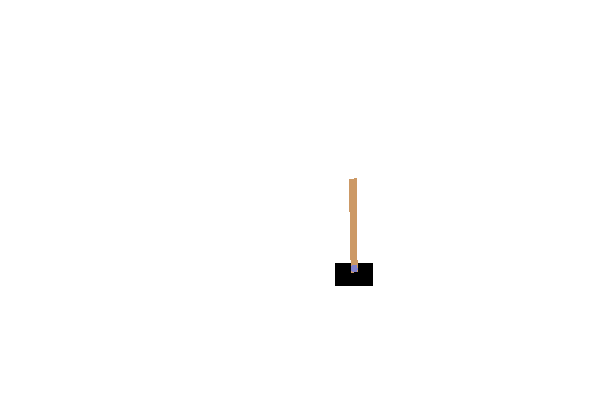
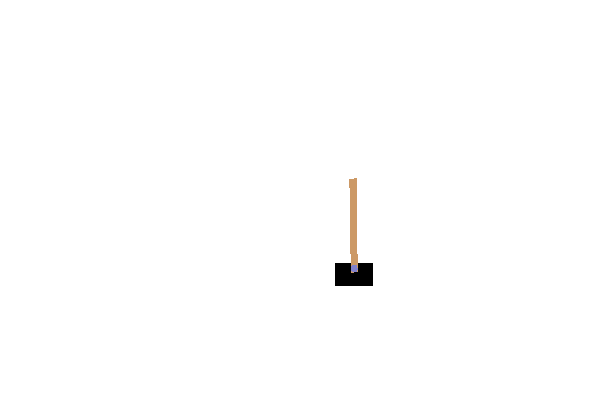
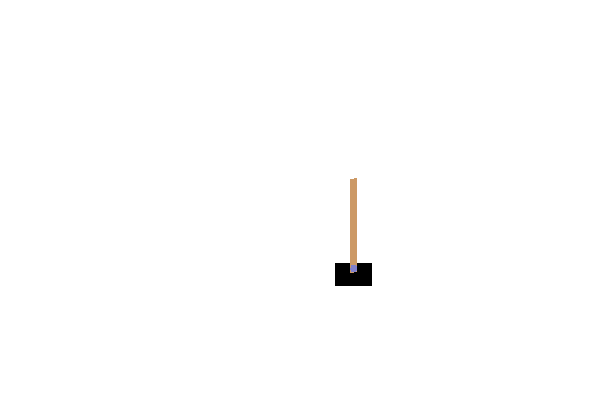
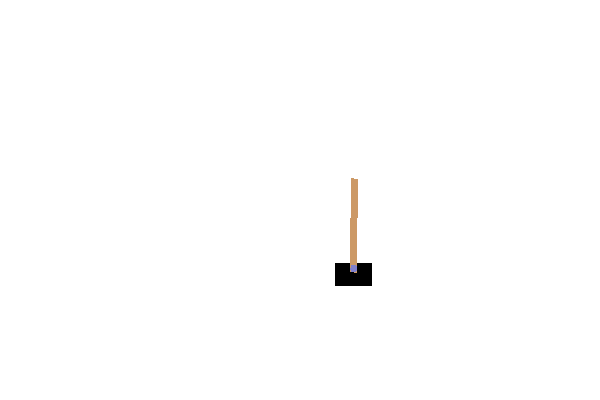
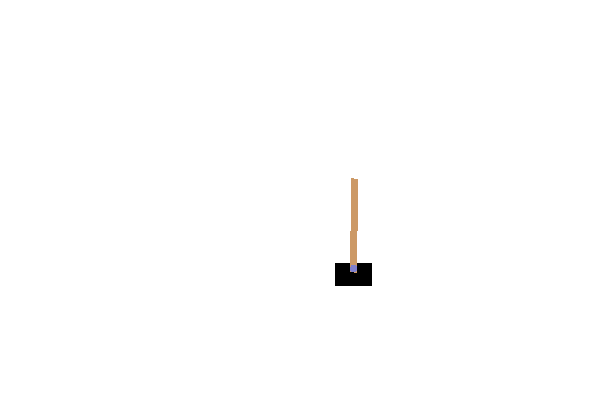
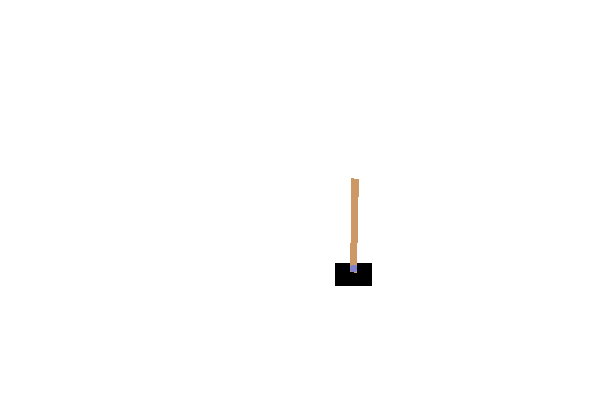
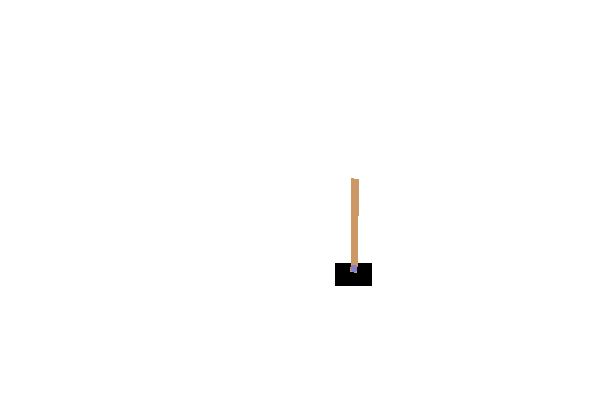
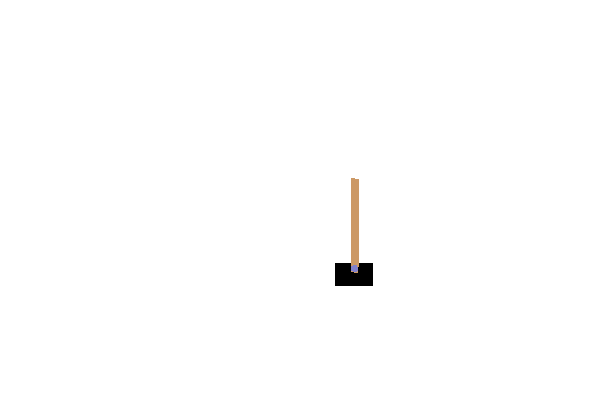
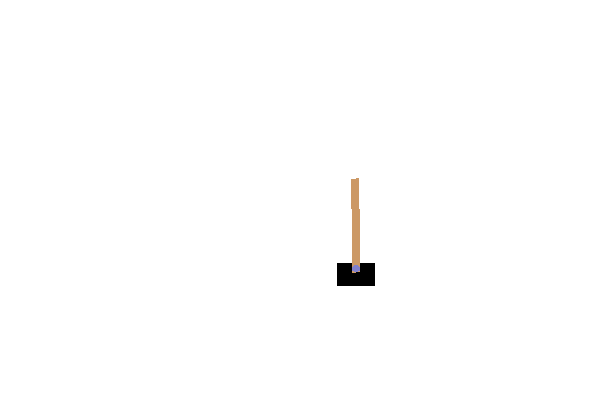
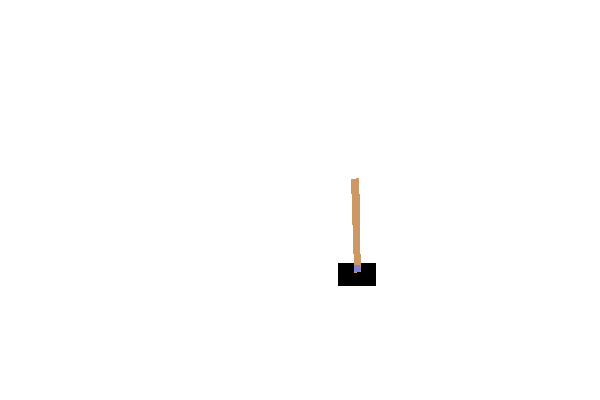
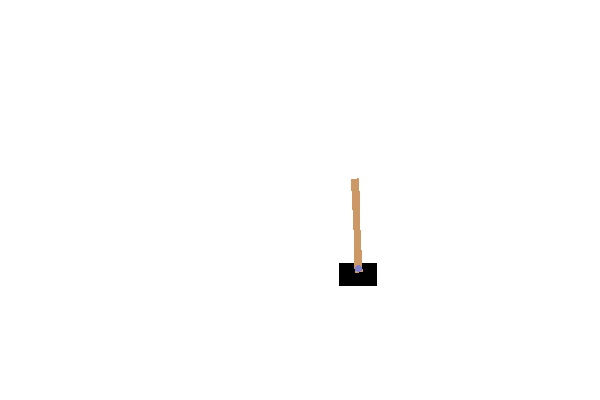
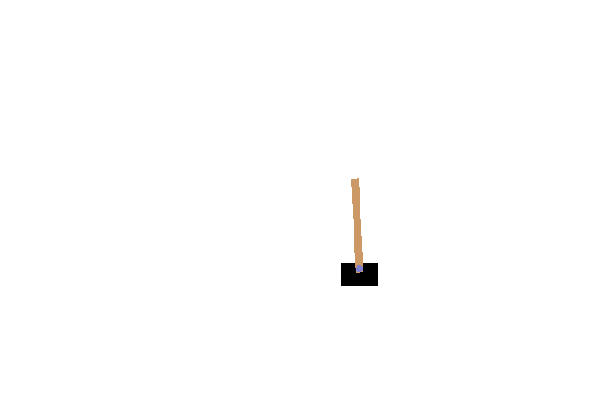
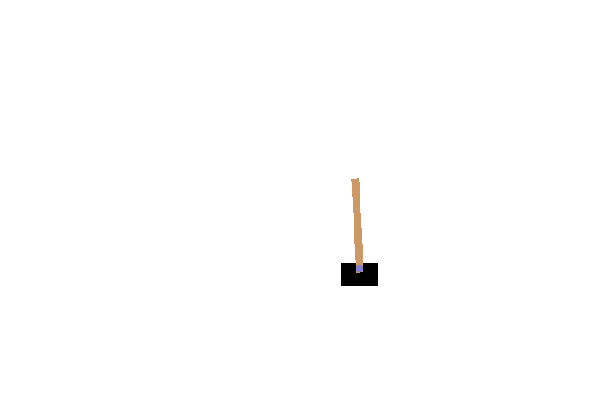
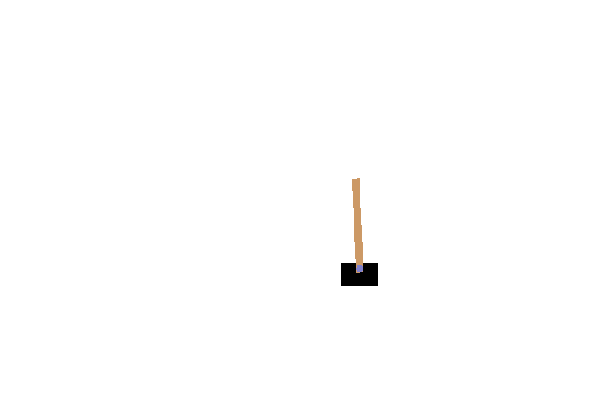
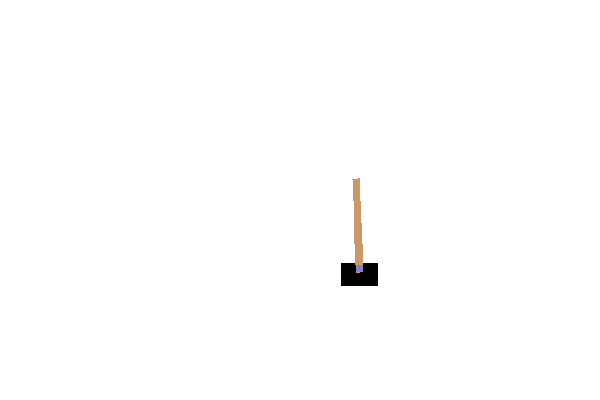
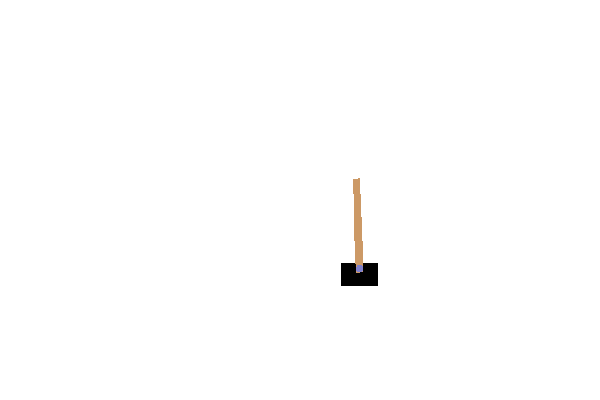
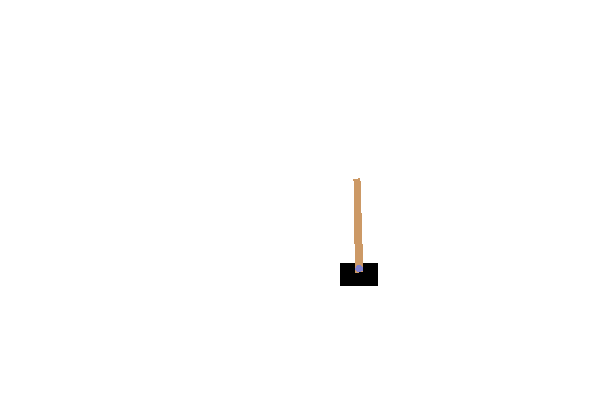
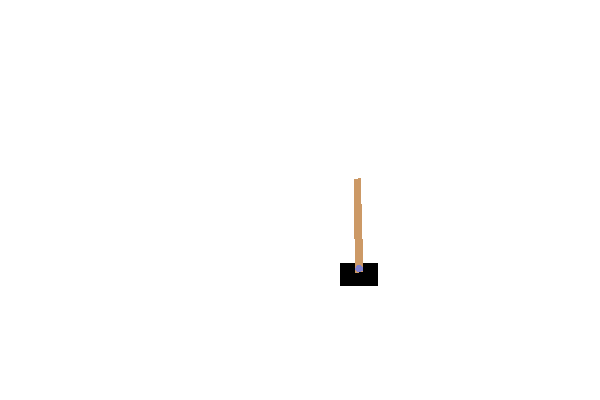
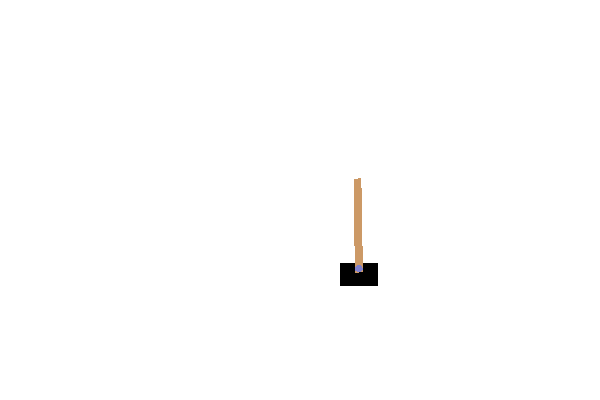
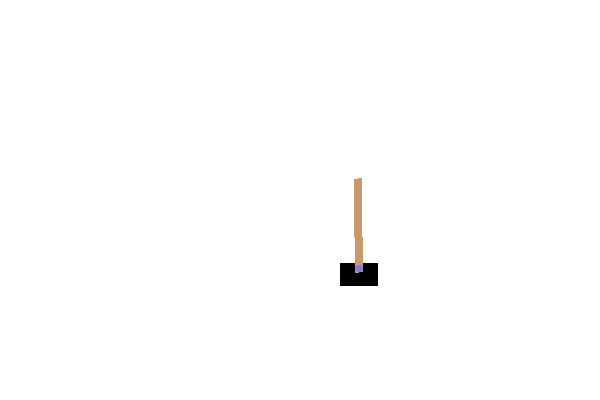
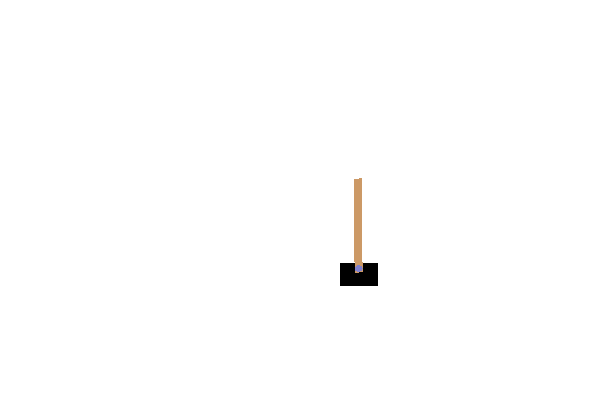
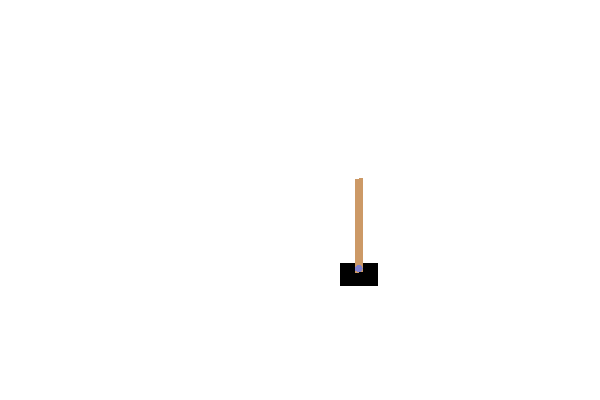
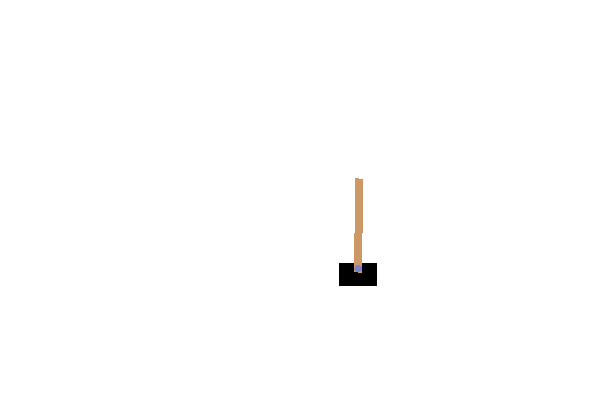
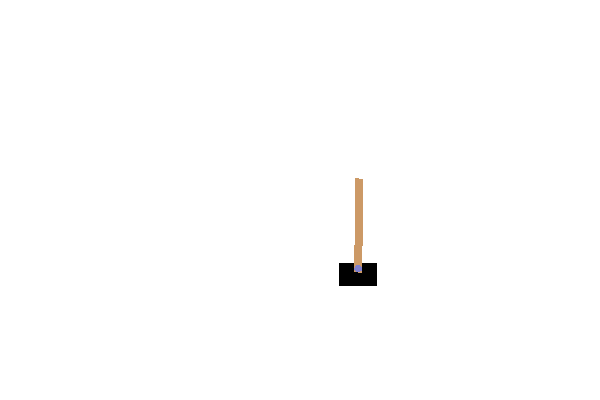
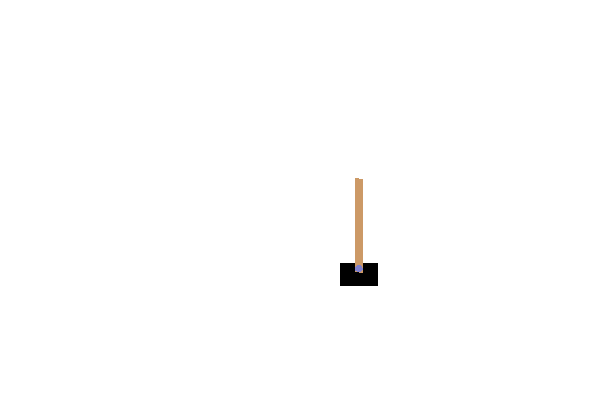
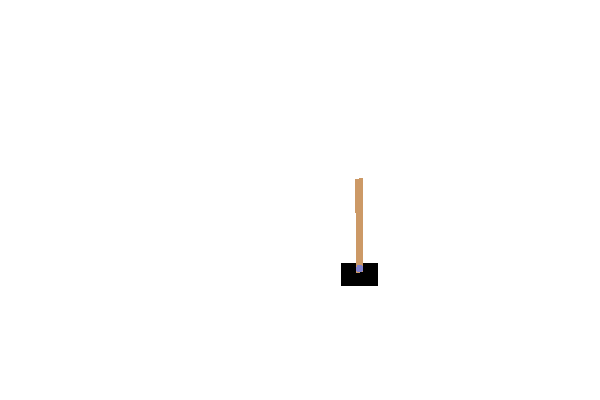
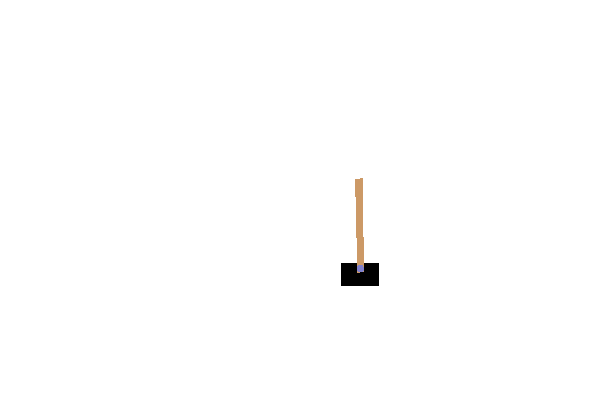
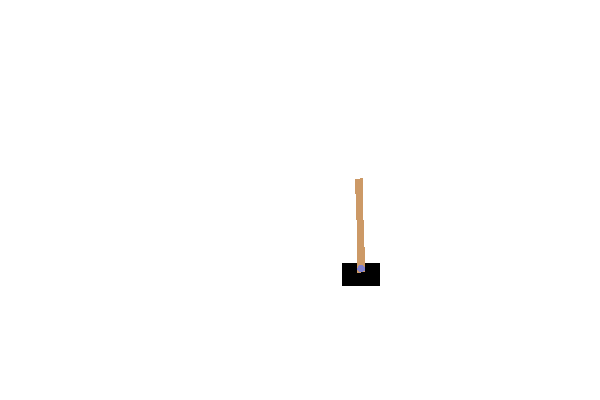
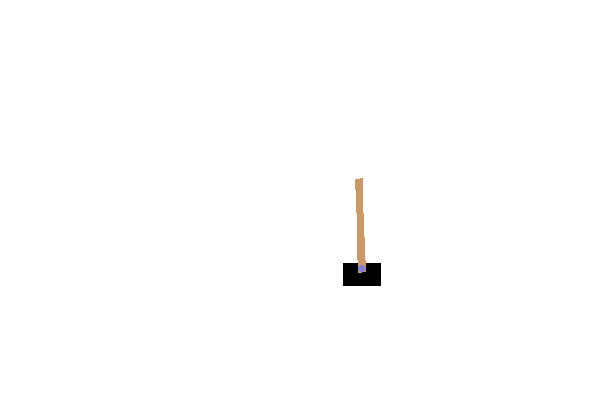
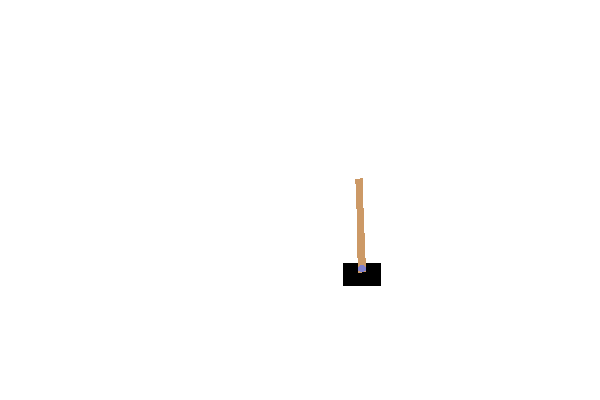
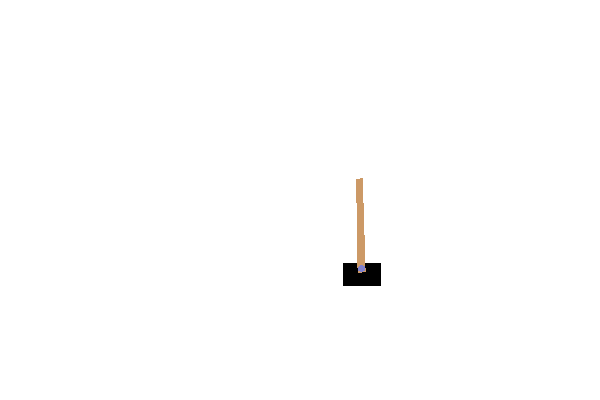
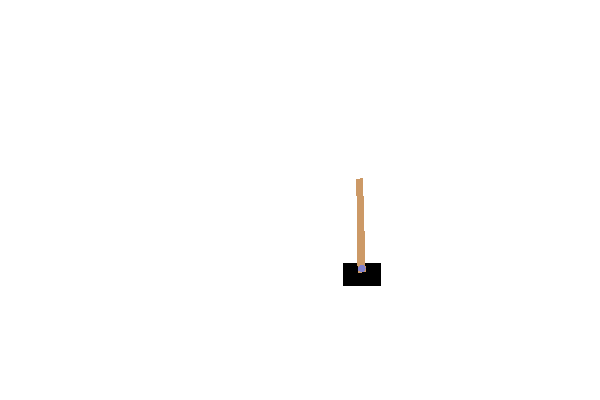
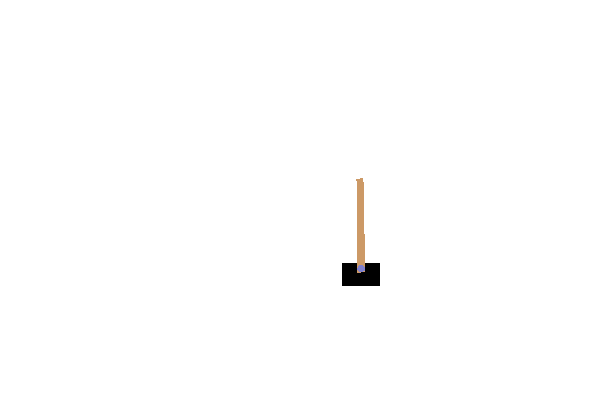
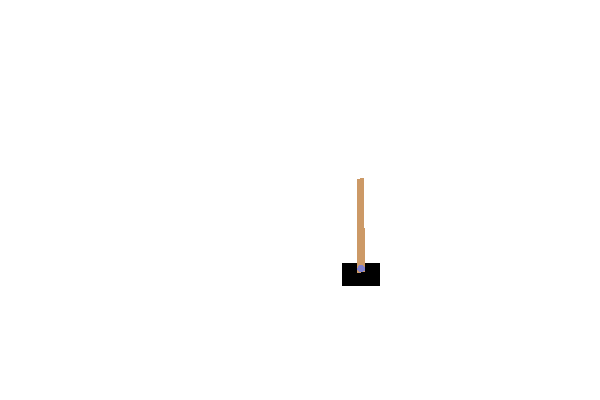
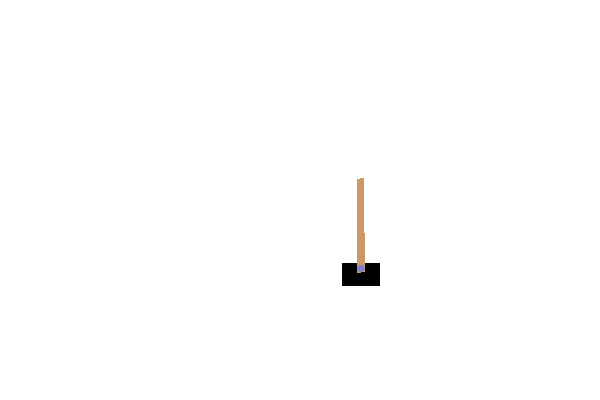
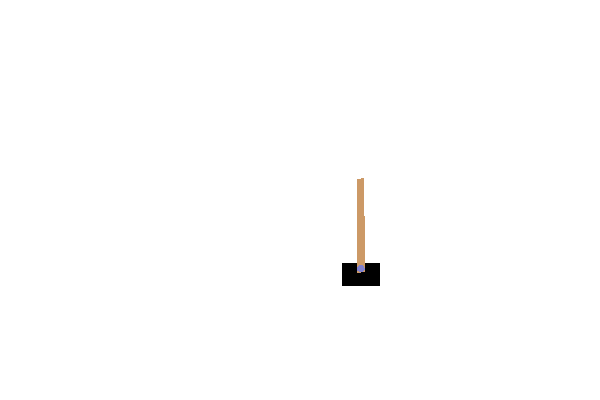
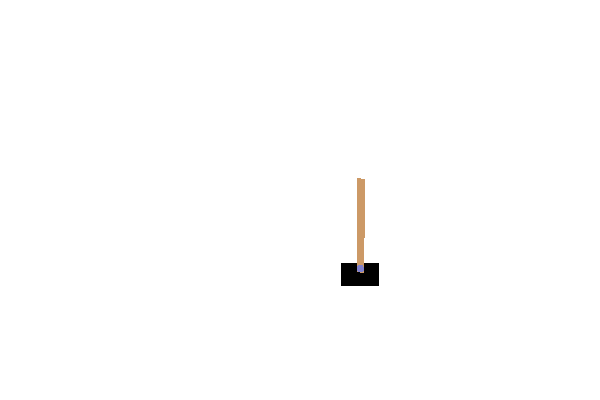
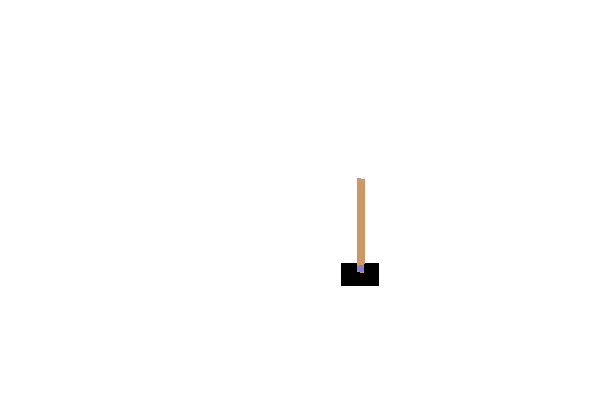
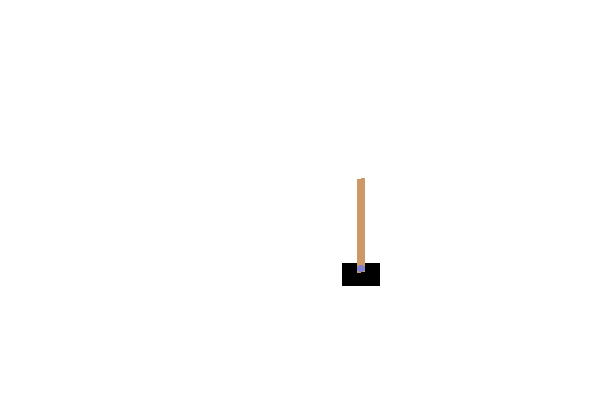
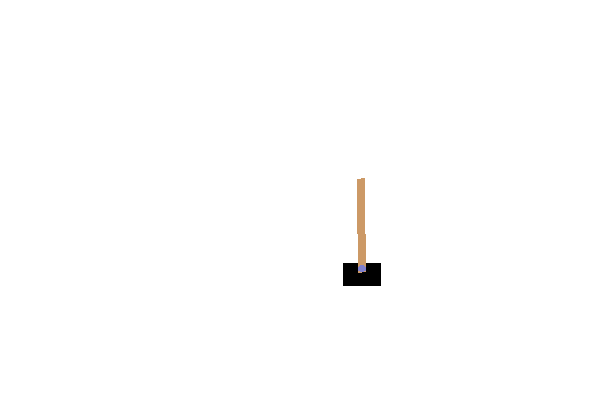
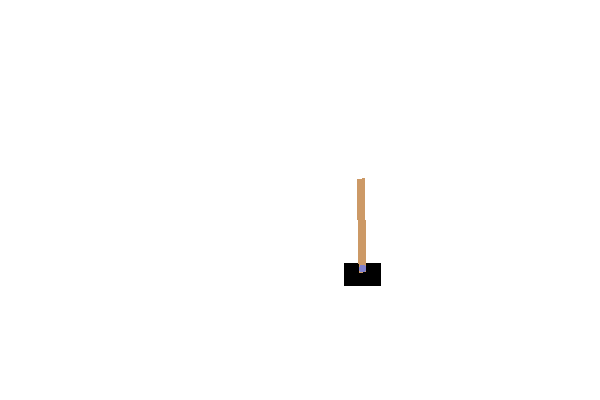
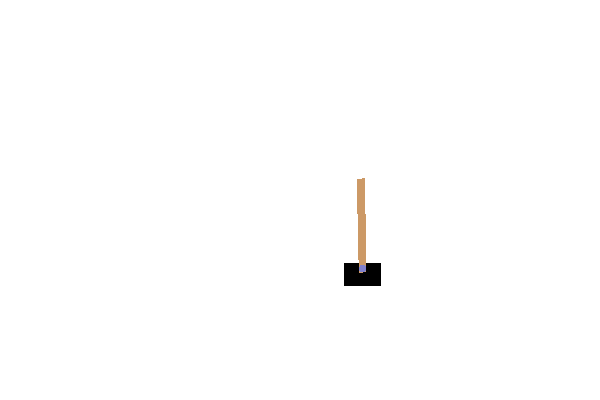
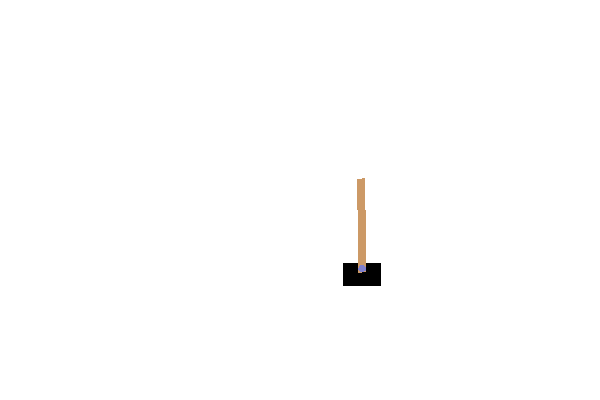
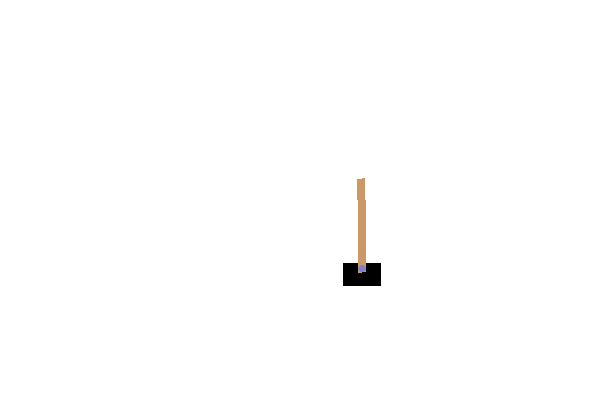
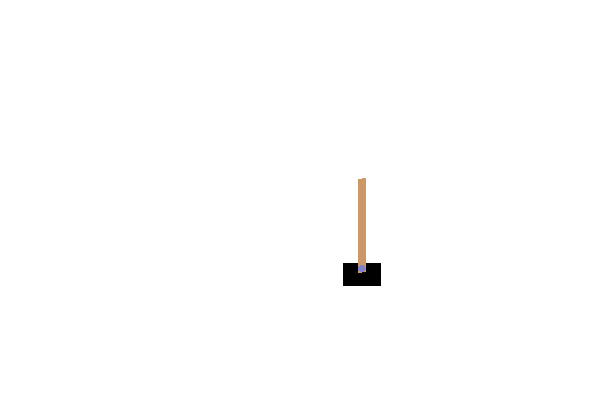
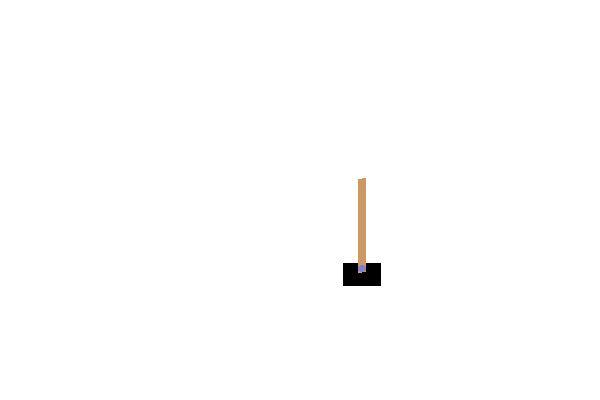
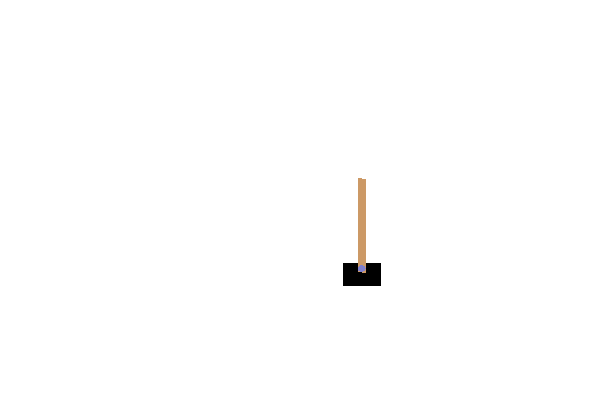
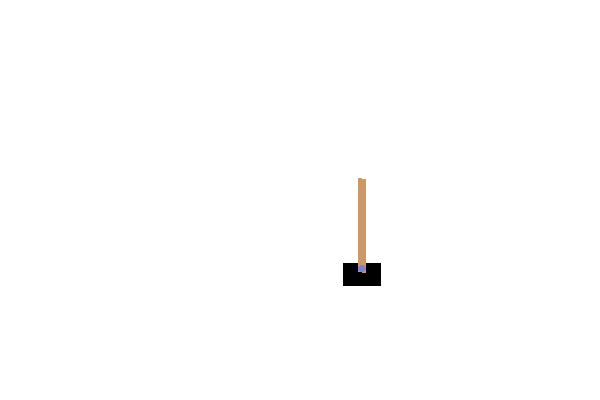
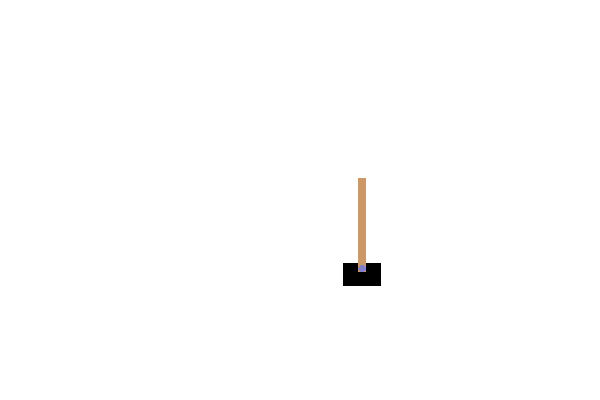
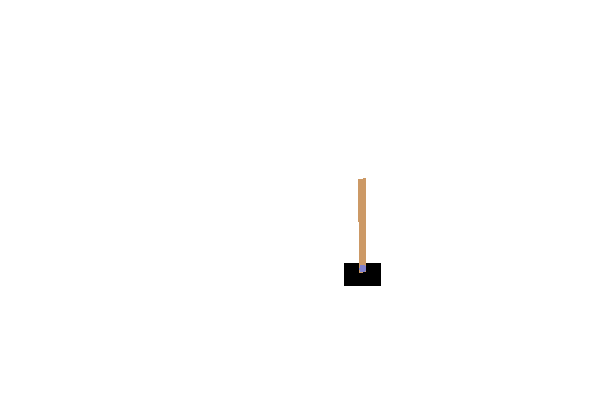
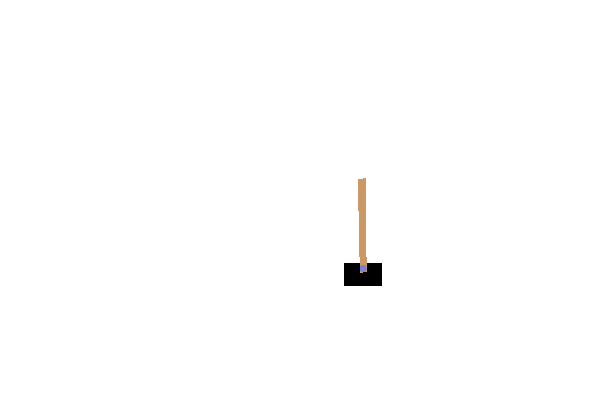
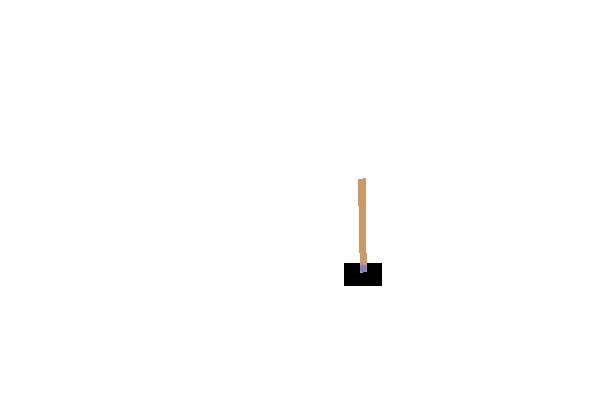
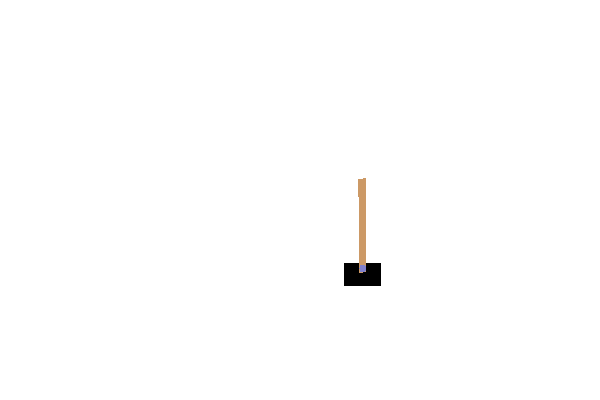
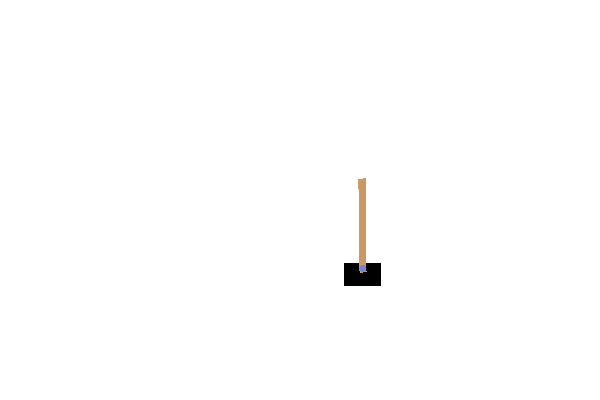
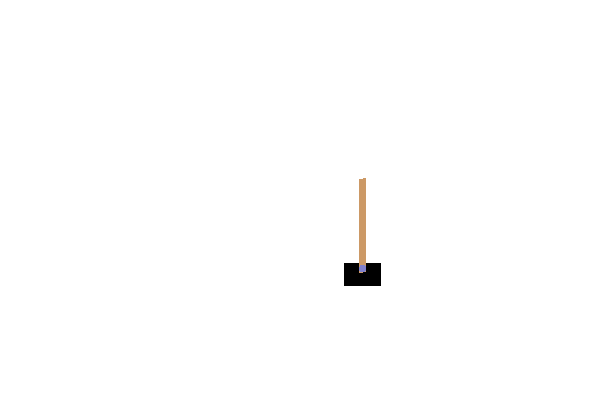
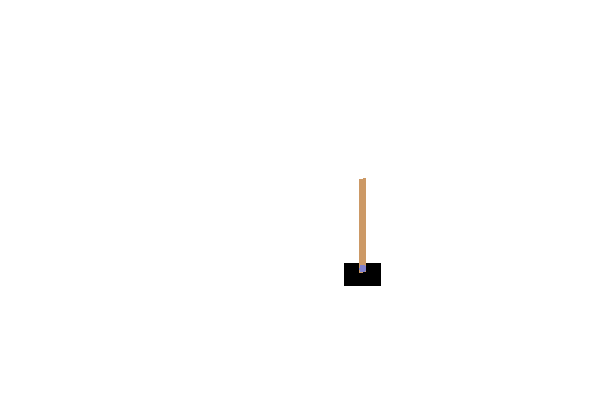
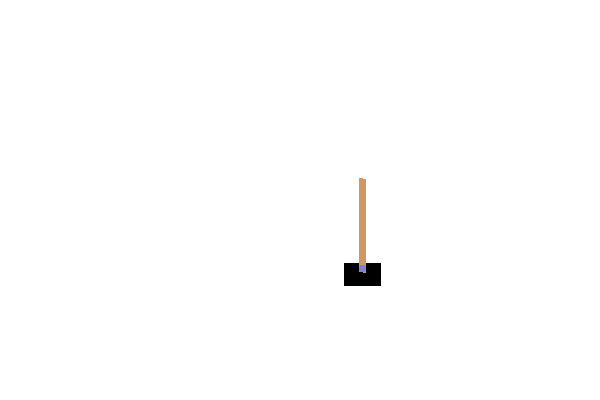
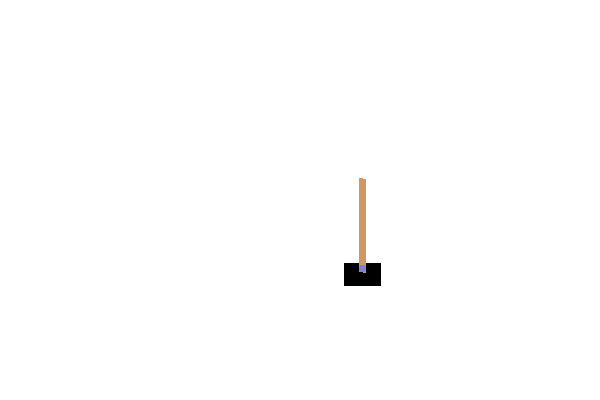
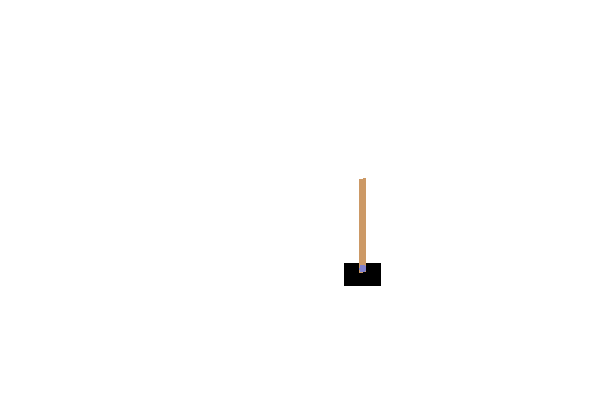
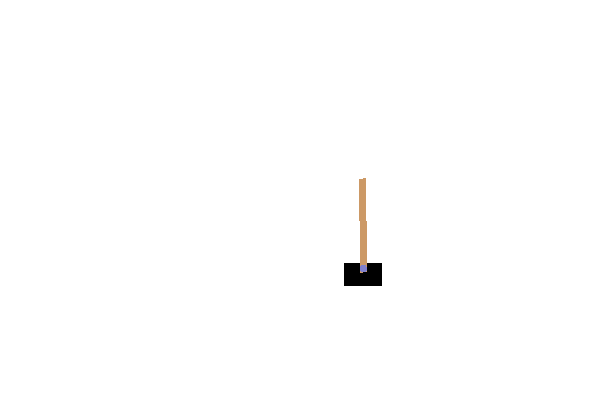
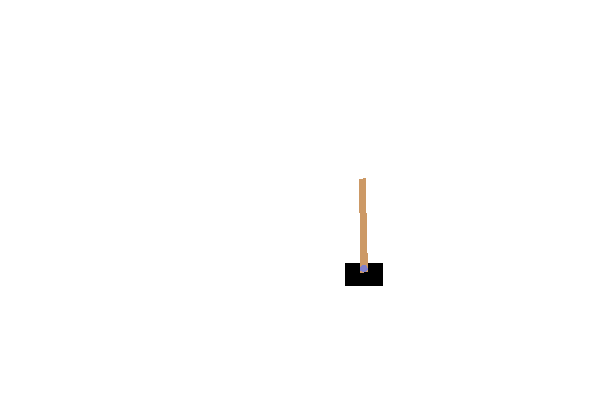
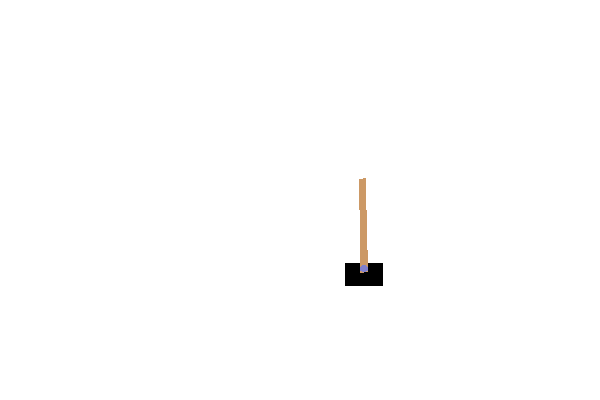
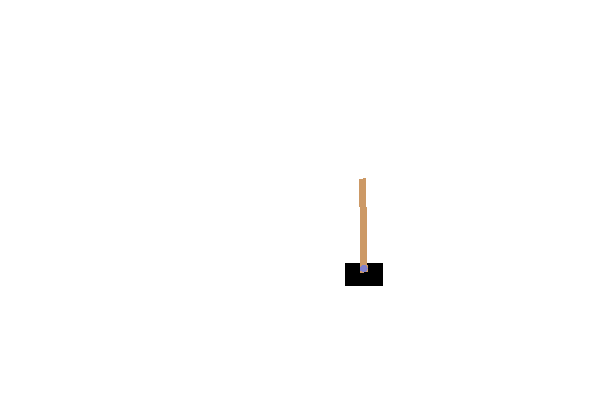
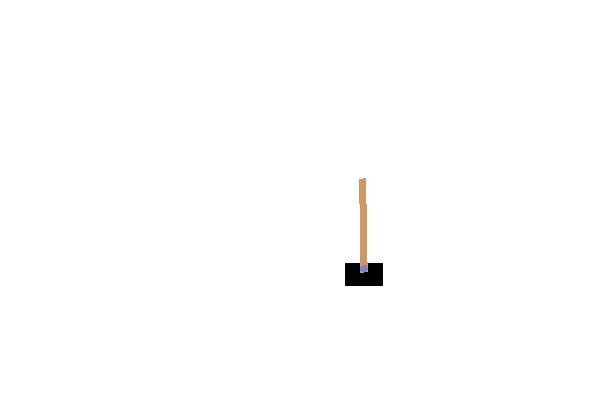
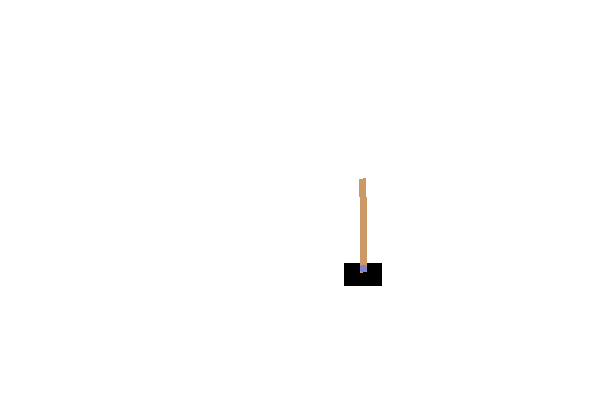
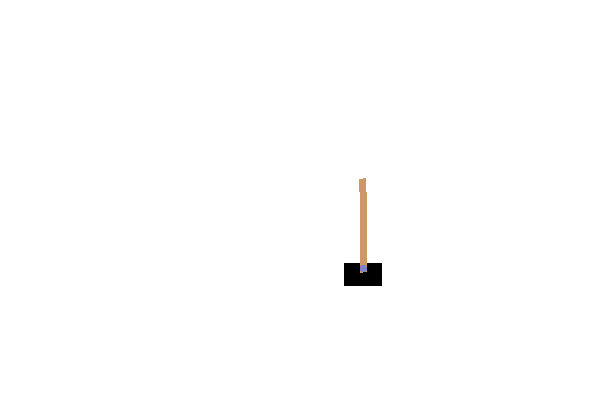

In [3]:
cartpole_env = Environment()
cartpole_env.run()